# 1. 라이브러리 불러오기

In [1]:
import os
import platform

import pandas as pd
import numpy as np

pd.set_option('max.columns', 100)

import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno

if platform.system() == "Windows":
    plt.rcParams["font.family"] = "Malgun Gothic"
else:
    plt.rcParams["font.family"] = "AppleGothic"
    
plt.style.use('ggplot')
%matplotlib inline

import warnings
warnings.filterwarnings(action = 'ignore')

# 2. 데이터 불러오기

In [2]:
# 데이터 확인
raw_data = pd.read_csv('Data/train_mdf.csv')

# 데이터 정보 확인
print('Shape of data :', raw_data.shape, '\n')
print('-' * 50, '\n')
print(raw_data.info())

Shape of data : (1460, 81) 

-------------------------------------------------- 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle    

- **1,460**개의 관측치와 **81**개의 변수가 존재함을 확인할 수 있다.


- 또한, 현재 변수에 결측치가 포함되어 있음을 확인할 수 있다.

In [3]:
# 데이터 일부분 살펴보기
display(raw_data.head())

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


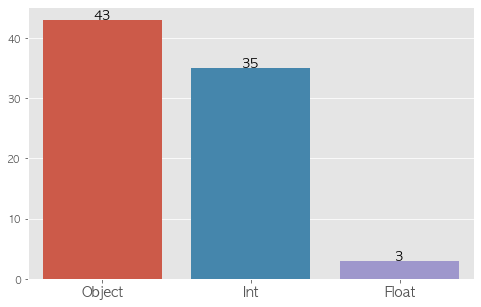

In [5]:
# 데이터 타입별 개수 시각화
plot_data = pd.DataFrame(raw_data.dtypes.value_counts(), columns = ['Count'])
plot_data.index = ['Object', 'Int', 'Float']

# 시각화
plt.figure(figsize = (8, 5))

sns.barplot(x = plot_data.index, y = 'Count', data = plot_data)
plt.xticks(fontsize = 14)
plt.ylabel('')

for index, [value] in enumerate(plot_data.values):
    plt.text(index, value, value, ha = 'center', fontsize = 13)

- 81개의 변수 중에서 Numerical Data(수치형 데이터)는 Index를 의미하는 **Id** 변수를 포함해 **38**개가 존재한다.


- 81개의 변수 중에서 Categorical Data(범주형 데이터)는 **43**개가 존재한다.

# 3. 결측치 처리

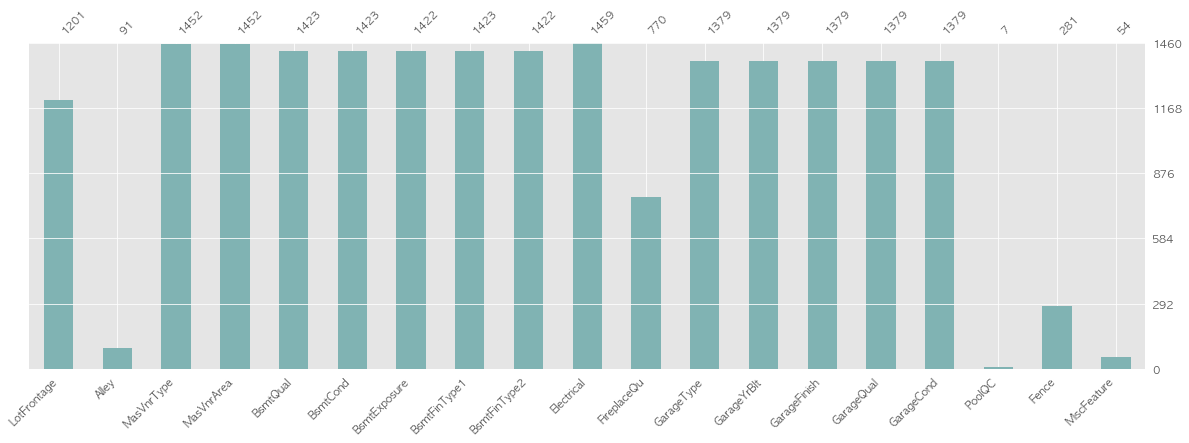

In [10]:
# 결측치를 포함하고 있는 features 추출
null_data = pd.DataFrame(raw_data.isnull().sum(), columns = ['Count'])
null_list = null_data[null_data['Count'] > 0].index

# 추출 후 시각화
msno.bar(raw_data[null_list], color = (0.5, 0.7, 0.7), fontsize = 11, figsize = (20, 6))
plt.yticks([])
plt.show()

- 위의 시각화를 통해, 총 19개의 변수에서 결측치가 존재함을 확인할 수 있다.


- 하지만, [Kaggle: House Prices](https://www.kaggle.com/c/house-prices-advanced-regression-techniques/overview) 사이트의 설명을 통해 범주형 변수 **Alley, BsmtQual, BsmtCond, BsmtExposure, BsmtFinType1, BsmtFinType2, FireplaceQu, GarageType, GarageFinish, GarageQual, GarageCond, PoolQC, Fence, MiscFeature** 총 14개 변수의 결측치는 결측치를 의미하는 것이 아니라, 해당 시설이 없다는 것을 의미한다.


- 또한, **GarageYrBlt** 변수의 결측치는 해당 관측치에 Garage가 존재하지 않아서 결측치가 입력되었음을 알 수 있다.


- 따라서, 14개의 범주형 변수 결측치에는 해당 변수의 시설이 없다는 의미로 **'No have'** 를 채워주고, **GarageYrBlt** 변수의 결측치에는 변수 타입을 통일시키기 위해 **'9999'** 의 값을 넣어주도록 하자.

In [11]:
object_list = ['Alley', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 
               'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 
               'PoolQC', 'Fence', 'MiscFeature']

# 원래 데이터를 보존하기 위해 새로운 DataFrame 생성
modify_data = raw_data.copy()

# 결측치를 의미하지 않는 값에 'No have' 채워넣기
for feature in object_list:
    null_data = modify_data[feature].isnull().sum()
    print('Number of null values of {} *Before Modify* :'.format(feature), null_data, '\n')
    
    modify_data.loc[modify_data[feature].isnull(), feature] = 'No have'
    
    null_data = modify_data[feature].isnull().sum()
    print('Number of null values of {} *After Modify* :'.format(feature), null_data)
    print('-' * 60)

Number of null values of Alley *Before Modify* : 1369 

Number of null values of Alley *After Modify* : 0
------------------------------------------------------------
Number of null values of BsmtQual *Before Modify* : 37 

Number of null values of BsmtQual *After Modify* : 0
------------------------------------------------------------
Number of null values of BsmtCond *Before Modify* : 37 

Number of null values of BsmtCond *After Modify* : 0
------------------------------------------------------------
Number of null values of BsmtExposure *Before Modify* : 38 

Number of null values of BsmtExposure *After Modify* : 0
------------------------------------------------------------
Number of null values of BsmtFinType1 *Before Modify* : 37 

Number of null values of BsmtFinType1 *After Modify* : 0
------------------------------------------------------------
Number of null values of BsmtFinType2 *Before Modify* : 38 

Number of null values of BsmtFinType2 *After Modify* : 0
---------------

In [12]:
print('Number of null values of GarageYrBlt *Before Modify* :', modify_data['GarageYrBlt'].isnull().sum(), '\n')

# 'GarageYrBlt' 변수 결측치 대체
modify_data.loc[modify_data['GarageYrBlt'].isnull(), 'GarageYrBlt'] = 9999
print('Number of null values of GarageYrBlt *After Modify* :', modify_data['GarageYrBlt'].isnull().sum())

Number of null values of GarageYrBlt *Before Modify* : 81 

Number of null values of GarageYrBlt *After Modify* : 0


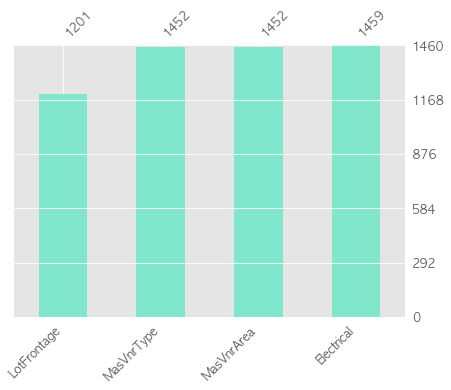

In [14]:
# 변경해준 뒤 결측치 확인
null_data = pd.DataFrame(modify_data.isnull().sum(), columns = ['Count'])
null_list = null_data[null_data['Count'] > 0].index

# 추출 후 시각화
msno.bar(modify_data[null_list], color = (0.5, 0.9, 0.8), fontsize = 12, figsize = (7, 5))
plt.yticks([])
plt.show()

- **MasVnrType**의 값이 결측치일 때, **MasVnrArea**의 값 역시 결측치임을 확인할 수 있다.


- 결측치의 개수가 8개 뿐이므로 **MasVnrType** 변수에는 **'None'** 의 값을, **MasVnrArea** 변수에는 **'0'** 의 값을 넣어주자.


- **Electrical** 변수의 경우 1개의 결측치가 있으며, 최빈값으로 대체해주도록 하자.

In [15]:
print('Number of null values of MasVnrType *Before* :', modify_data['MasVnrType'].isnull().sum(), '\n')
print('Number of null values of MasVnrArea *Before* :', modify_data['MasVnrArea'].isnull().sum(), '\n')
print('Number of null values of Electrical *Before* :', modify_data['Electrical'].isnull().sum(), '\n')

modify_data['MasVnrType'].fillna('None', inplace = True)
modify_data['MasVnrArea'].fillna(0, inplace = True)
modify_data['Electrical'].fillna(modify_data['Electrical'].mode()[0], inplace = True)

print('Number of null values of MasVnrType *After* :', modify_data['MasVnrType'].isnull().sum(), '\n')
print('Number of null values of MasVnrArea *After* :', modify_data['MasVnrArea'].isnull().sum(), '\n')
print('Number of null values of Electrical *After* :', modify_data['Electrical'].isnull().sum())

Number of null values of MasVnrType *Before* : 8 

Number of null values of MasVnrArea *Before* : 8 

Number of null values of Electrical *Before* : 1 

Number of null values of MasVnrType *After* : 0 

Number of null values of MasVnrArea *After* : 0 

Number of null values of Electrical *After* : 0


In [17]:
print('Number of incorrectly entered value *Wd Shng* :',
      len(modify_data[modify_data['Exterior2nd'] == 'Wd Shng']), '\n')

print('Number of incorrectly entered value *CmentBd* :',
      len(modify_data[modify_data['Exterior2nd'] == 'CmentBd']), '\n')

print('Number of incorrectly entered value *Brk Cmn* :',
      len(modify_data[modify_data['Exterior2nd'] == 'Brk Cmn']))

Number of incorrectly entered value *Wd Shng* : 38 

Number of incorrectly entered value *CmentBd* : 60 

Number of incorrectly entered value *Brk Cmn* : 7


- **Exterior2nd** 변수를 확인해보면, 변수 설명과 다르게 잘못 기입된 값이 있다.


- 잘못 기입된 범주는 총 3개이며, 105개의 관측치가 그러함을 볼 수 있다.


- 잘못 기입된 값들을 올바르게 변경해주도록 하자.

In [18]:
modify_data.loc[modify_data['Exterior2nd'] == 'Wd Shng', 'Exterior2nd'] = 'Wd Sdng'
modify_data.loc[modify_data['Exterior2nd'] == 'CmentBd', 'Exterior2nd'] = 'CemntBd'
modify_data.loc[modify_data['Exterior2nd'] == 'Brk Cmn', 'Exterior2nd'] = 'BrkComm'

print('Number of incorrectly entered value *Wd Shng* :',
      len(modify_data[modify_data['Exterior2nd'] == 'Wd Shng']), '\n')

print('Number of incorrectly entered value *CmentBd* :',
      len(modify_data[modify_data['Exterior2nd'] == 'CmentBd']), '\n')

print('Number of incorrectly entered value *Brk Cmn* :',
      len(modify_data[modify_data['Exterior2nd'] == 'Brk Cmn']))

Number of incorrectly entered value *Wd Shng* : 0 

Number of incorrectly entered value *CmentBd* : 0 

Number of incorrectly entered value *Brk Cmn* : 0


- 잘못 기입된 값들이 모두 올바른 값으로 바뀌었다.


- 현재 데이터에 변수의 개수가 81개로, 매우 많기 때문에 변수의 유형을 나누어서 분석을 수행해주도록 한다.

# 4. 범주형 변수 (Categorical Variable) EDA

## 4.1. 명목형 변수 (Norminal Variable)

In [20]:
norm_list = ['MSSubClass', 'MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities',
             'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 
             'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
             'Foundation', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'CentralAir',
             'Electrical', 'Functional', 'GarageType', 'GarageFinish', 'PavedDrive', 'Fence', 'MiscFeature',
             'SaleType', 'SaleCondition']

print('Number of norminal variable :', len(norm_list), '\n')

# 명목형 변수의 데이터만 추출
norm_data = modify_data[norm_list]

# 데이터의 일부분 확인
display(norm_data.head())

Number of norminal variable : 34 



,MSSubClass,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,Foundation,BsmtExposure,BsmtFinType1,BsmtFinType2,Heating,CentralAir,Electrical,Functional,GarageType,GarageFinish,PavedDrive,Fence,MiscFeature,SaleType,SaleCondition
0,60,RL,Pave,No have,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,PConc,No,GLQ,Unf,GasA,Y,SBrkr,Typ,Attchd,RFn,Y,No have,No have,WD,Normal
1,20,RL,Pave,No have,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,Gable,CompShg,MetalSd,MetalSd,None,CBlock,Gd,ALQ,Unf,GasA,Y,SBrkr,Typ,Attchd,RFn,Y,No have,No have,WD,Normal
2,60,RL,Pave,No have,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,PConc,Mn,GLQ,Unf,GasA,Y,SBrkr,Typ,Attchd,RFn,Y,No have,No have,WD,Normal
3,70,RL,Pave,No have,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,Gable,CompShg,Wd Sdng,Wd Sdng,None,BrkTil,No,ALQ,Unf,GasA,Y,SBrkr,Typ,Detchd,Unf,Y,No have,No have,WD,Abnorml
4,60,RL,Pave,No have,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,PConc,Av,GLQ,Unf,GasA,Y,SBrkr,Typ,Attchd,RFn,Y,No have,No have,WD,Normal


In [25]:
# 명목형 변수를 탐색하는 과정을 함수로 만들기
def norm_data_check(data = modify_data, feature = 'MSSubClass', pie = True):
    
    # 결측치 개수 확인
    null_value = data[feature].isnull().sum()
    print('Number of null values of {} :'.format(feature), data[feature].isnull().sum(), '\n')
    
    # 우선 결측치가 존재하는 관측치는 제거하고 시각화를 해주도록 한다.
    data = data[~data[feature].isnull()]
    
    # 고유한 값 확인
    print('Number of unique values of {} :'.format(feature), len(data[feature].unique()), '\n')
    print('Unique values of {} :'.format(feature), np.sort(data[feature].unique()), '\n')
    
    # 최빈값 확인
    print('The mode of {} :'.format(feature), data[feature].mode()[0], '\n')
    
    # Pie Chart == True
    if pie == True:
        fig, axes = plt.subplots(ncols = 2, figsize = (16, 5))
        
        # Bar Plot
        plot_data = pd.DataFrame(data[feature].value_counts().sort_values(ascending = True))
        
        sns.barplot(x = plot_data.index, y = feature, data = plot_data, ax = axes[0])
        axes[0].set_ylabel('')
        
        for index, [value] in enumerate(plot_data.values):
            axes[0].text(index, value, value, ha = 'center', fontsize = 12)
            
        # Pie Chart
        plot_data = data[feature].value_counts().sort_values(ascending = True)
        length = len(data[feature].unique())
        
        plot_data.plot.pie(explode = np.repeat(0.13, length), autopct = '%.2f%%', fontsize = 12, ax = axes[1])
        axes[1].set_ylabel('')
        
        fig.tight_layout()

    # Pie Chart == False    
    else:
        plt.figure(figsize = (16, 5))
        
        plot_data = pd.DataFrame(data[feature].value_counts().sort_values(ascending = True))
        
        sns.barplot(x = plot_data.index, y = feature, data = plot_data)
        plt.xticks(rotation = 45)
        plt.ylabel('')
        
        for index, [value] in enumerate(plot_data.values):
            plt.text(index, value, value, ha = 'center', fontsize = 12)
            
        plt.show()

- 코드가 반복되는 부분이 많기 때문에, 명목형 변수를 확인할 수 있는 함수를 생성해주도록 한다.

### [1]. MSSubClass

**MSSubClass** : Identifies the type of dwelling involved in the sale. (주거 유형)
    
- **20** : 1-STORY 1946 & NEWER ALL STYLES


- **30** : 1-STORY 1945 & OLDER


- **40** : 1-STORY W/FINISHED ATTIC ALL AGES


- **45** : 1-1/2 STORY - UNFINISHED ALL AGES


- **50** : 1-1/2 STORY FINISHED ALL AGES


- **60** : 2-STORY 1946 & NEWER


- **70** : 2-STORY 1945 & OLDER


- **75** : 2-1/2 STORY ALL AGES


- **80** : SPLIT OR MULTI-LEVEL


- **85** : SPLIT FOYER


- **90** : DUPLEX - ALL STYLES AND AGES


- **120** : 1-STORY PUD (Planned Unit Development) - 1946 & NEWER


- **150** : 1-1/2 STORY PUD - ALL AGES


- **160** : 2-STORY PUD - 1946 & NEWER


- **180** : PUD - MULTILEVEL - INCL SPLIT LEV/FOYER


- **190** : 2 FAMILY CONVERSION - ALL STYLES AND AGES

Number of null values of MSSubClass : 0 

Number of unique values of MSSubClass : 15 

Unique values of MSSubClass : [ 20  30  40  45  50  60  70  75  80  85  90 120 160 180 190] 

The mode of MSSubClass : 20


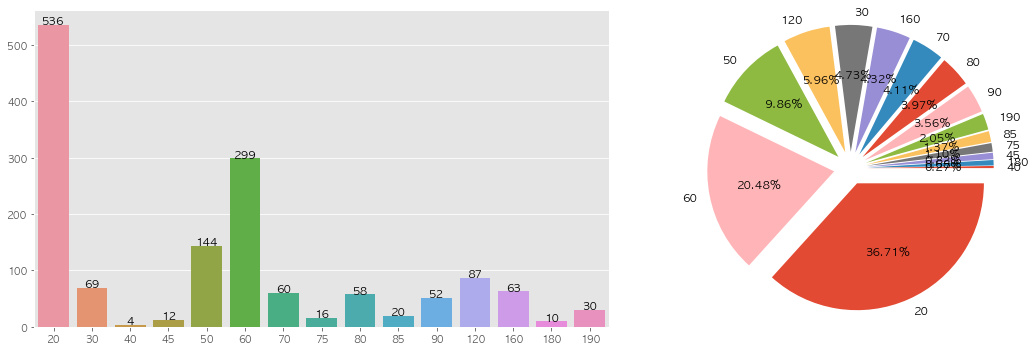

In [23]:
# 'MSSubClass' 변수 시각화
print('Number of null values of MSSubClass :', modify_data['MSSubClass'].isnull().sum(), '\n')
print('Number of unique values of MSSubClass :', len(modify_data['MSSubClass'].unique()), '\n')
print('Unique values of MSSubClass :', np.sort(modify_data['MSSubClass'].unique()), '\n')
print('The mode of MSSubClass :', modify_data['MSSubClass'].mode()[0])

fig, axes = plt.subplots(ncols = 2, figsize = (16, 5))

# Bar Plot
plot_data = pd.DataFrame(modify_data['MSSubClass'].value_counts().sort_index())

sns.barplot(x = plot_data.index, y = 'MSSubClass', data = plot_data, ax = axes[0])
axes[0].set_ylabel('')

for index, [value] in enumerate(plot_data.values):
    axes[0].text(index, value, value, ha = 'center', fontsize = 11)
    
# Pie Chart
plot_data = modify_data['MSSubClass'].value_counts().sort_values()
plot_data.plot.pie(explode = np.repeat(0.13, 15), autopct = '%.2f%%', fontsize = 11, ax = axes[1])
axes[1].set_ylabel('')
    
fig.tight_layout()

- **MSSubClass** 변수의 경우 총 16개의 범주가 존재하지만, 해당 데이터에서는 15개의 범주만 존재한다.


- 현재 **150 : 1-1/2 STORY PUD - ALL AGES** 범주가 관측되지 않는다.

### [2]. MSZoning

**MSZoning**: Identifies the general zoning classification of the sale. (판매의 일반적인 구역 분류)


- **A**: Agriculture (농업)


- **C**: Commercial (상업)


- **FV**: Floating Village Residential (떠다니는 마을)


- **I**: Industrial (산업)


- **RH**: Residential High Density


- **RL**: Residential Low Density


- **RP**: Residential Low Density Park


- **RM**: Residential Medium Density

Number of null values of MSZoning : 0 

Number of unique values of MSZoning : 5 

Unique values of MSZoning : ['C (all)' 'FV' 'RH' 'RL' 'RM'] 

The mode of MSZoning : RL 



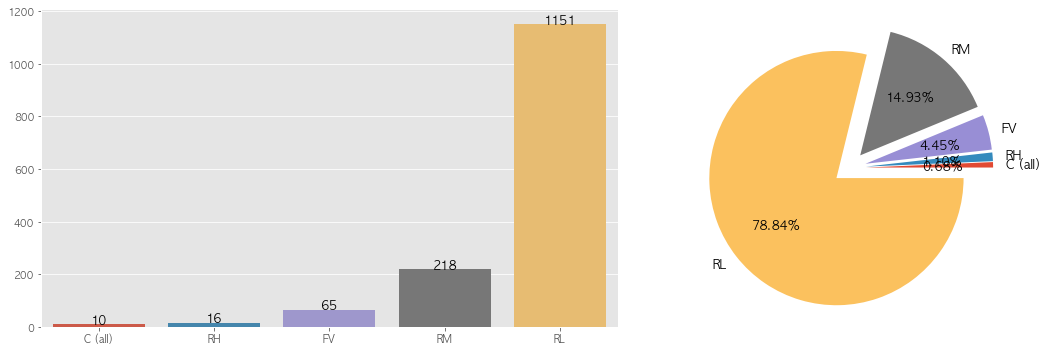

In [26]:
norm_data_check(data = modify_data, feature = 'MSZoning', pie = True)

- **MSZoning** 변수는 총 8개의 범주가 있지만, 실제 관측치에서는 5개의 범주만 관측된다.


- **Agriculture, Commercial, Residential Low Density Park** 총 3개의 범주가 관측되지 않는다.


- 시각화를 통해 살펴보면, **RL : Residential Low Density** 구역이 가장 많이 관측된다.

### [3]. Street

**Street** : Type of road access to property (건물로 접근하는 도로 유형)

- **Grvl** : Gravel (비포장도로)


- **Pave** : Paved (포장도로)

Number of null values of Street : 0 

Number of unique values of Street : 2 

Unique values of Street : ['Grvl' 'Pave'] 

The mode of Street : Pave 



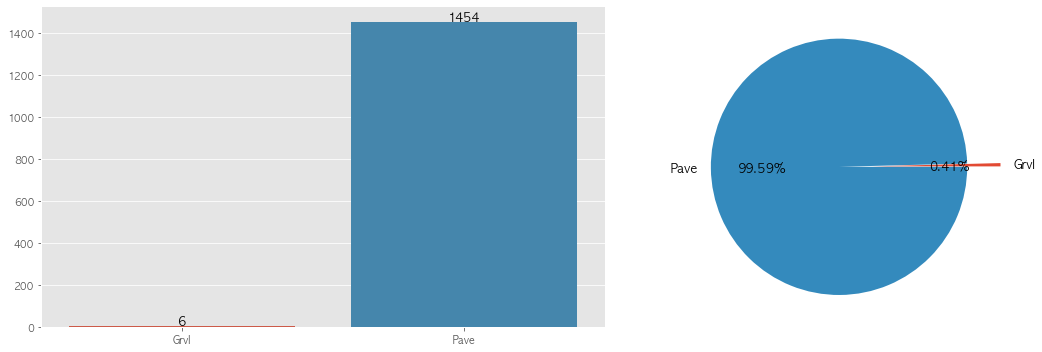

In [27]:
norm_data_check(data = modify_data, feature = 'Street', pie = True)

- 시각화를 통하여, 건물로 접근하는 도로 유형의 대부분이 포장도로임을 알 수 있다.


- **Street** 변수를 분석에 사용하는데는 도움이 되지 않을 것으로 판단된다.

### [4]. Alley

**Alley** : Type of alley access to property (건물로 접근하는 골목 유형)

- **Grvl** : Gravel


- **Pave** : Paved


- **NO** : No alley access

Number of null values of Alley : 0 

Number of unique values of Alley : 3 

Unique values of Alley : ['Grvl' 'No have' 'Pave'] 

The mode of Alley : No have 



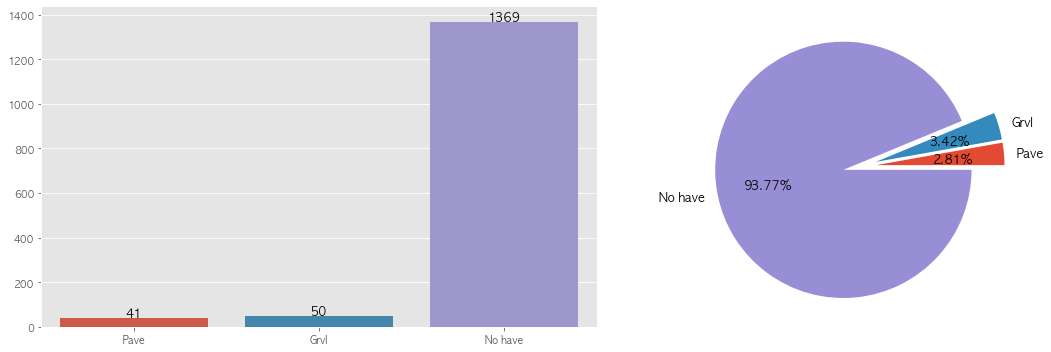

In [28]:
norm_data_check(data = modify_data, feature = 'Alley', pie = True)

- 시각화를 통하여, 대부분의 건물에 접근하는 골목이 없음을 볼 수 있다.

### [5]. LotShape

**LotShape** : General shape of property (건물의 일반적인 모양)

- **Reg** : Regular (규칙적)


- **IR1** : Slightly irregular (약간 불규칙)


- **IR2** : Moderately irregular (중간정도의 불규칙)


- **IR3** : Irregular (불규칙)

Number of null values of LotShape : 0 

Number of unique values of LotShape : 4 

Unique values of LotShape : ['IR1' 'IR2' 'IR3' 'Reg'] 

The mode of LotShape : Reg 



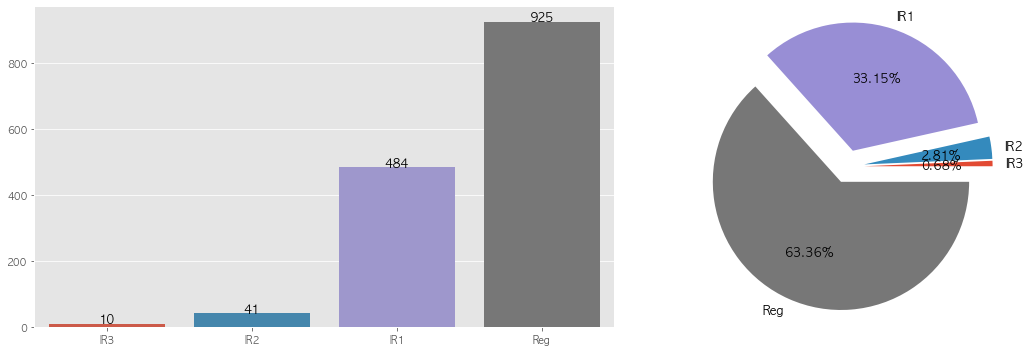

In [29]:
norm_data_check(data = modify_data, feature = 'LotShape', pie = True)

- 약 63%의 건물이 규칙적인 건물로 관측된다.


- **IR2, IR3** 의 경우 각각 41, 10개로 매우 적은 수만 관측됨을 볼 수 있다.


- 따라서, LotShape 변수를 **규칙과 불규칙**만을 나타내는 **NewLotShpae** 변수를 생성해주도록 하자.

#### [5-1]. 'NewLotShape' 변수 생성

In [31]:
# 'NewLotShape' 변수 생성
print('Shape of modify_data *Before Create* :', modify_data.shape, '\n')

modify_data['NewLotShape'] = np.nan

for index in modify_data.index:
    
    value = modify_data.loc[index, 'LotShape']
    
    if value == 'Reg':
        modify_data.loc[index, 'NewLotShape'] = 'Reg'
        
    else:
        modify_data.loc[index, 'NewLotShape'] = 'IR'
        
print('Shape of modify_data *After Create* :', modify_data.shape, '\n')
print('Unique of values of NewLotShape :', modify_data['NewLotShape'].unique())

Shape of modify_data *Before Create* : (1460, 81) 

Shape of modify_data *After Create* : (1460, 82) 

Unique of values of NewLotShape : ['Reg' 'IR']


### [6]. LandContour

**LandContour** : Flatness of the property (건물의 평탄함)

- **Lvl** : Near Flat/Level


- **Bnk** : Banked - Quick and significant rise from street grade to building


- **HLS** : Hillside - Significant slope from side to side


- **Low** : Depression

Number of null values of LandContour : 0 

Number of unique values of LandContour : 4 

Unique values of LandContour : ['Bnk' 'HLS' 'Low' 'Lvl'] 

The mode of LandContour : Lvl 



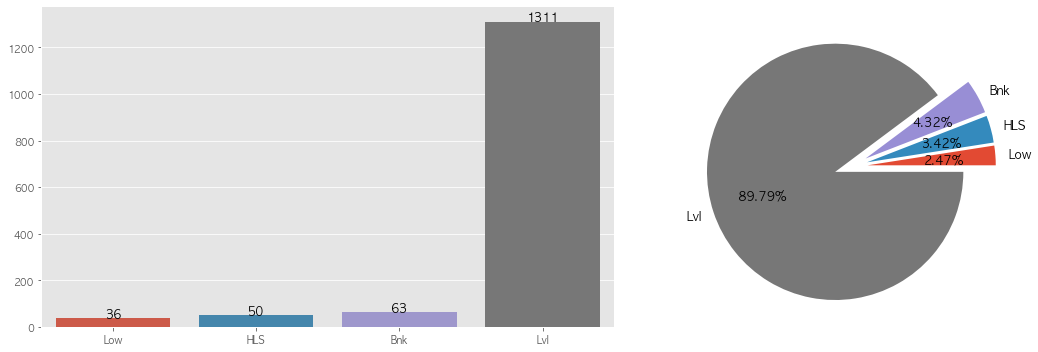

In [32]:
norm_data_check(data = modify_data, feature = 'LandContour', pie = True)

### [7]. Utilities

**Utilities** : Type of utilities available (사용 가능한 공익사업)

- **AllPub** : All public utilities (Electricity, Gas, Water, Septic Tank)


- **NoSewr** : Electricity, Gas, and Water


- **NoSeWa** : Electricity, and Gas Only


- **ELO** : Electricity only

Number of null values of Utilities : 0 

Number of unique values of Utilities : 2 

Unique values of Utilities : ['AllPub' 'NoSeWa'] 

The mode of Utilities : AllPub 



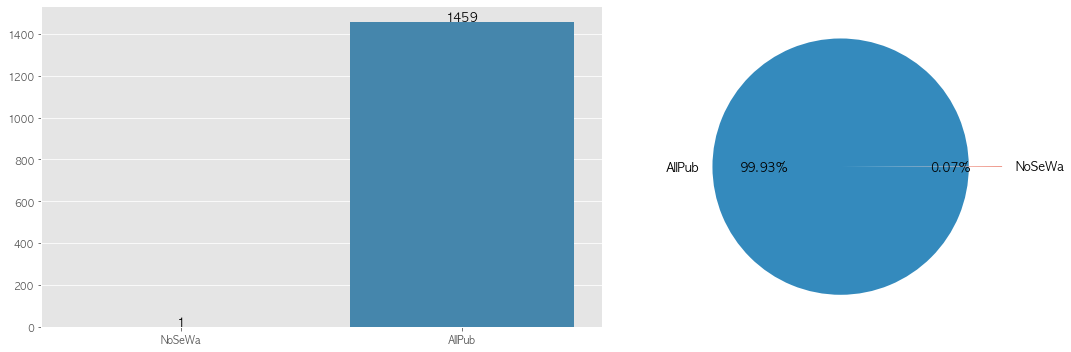

In [33]:
norm_data_check(data = modify_data, feature = 'Utilities', pie = True)

- 1개의 관측치를 제외하고서는 모든 관측치에서 모든 공익사업을 사용가능하다. 

### [8]. LotConfig

**LotConfig** : Lot configuration(배치, 배열)

- **Inside** : Inside lot


- **Corner** : Corner lot


- **CulDSac** : Cul-de-sac [Cul-de-sac의 설명](https://cafe.naver.com/ristudyabroad/225)


- **FR2** : Frontage on 2 sides of property


- **FR3** : Frontage on 3 sides of property

Number of null values of LotConfig : 0 

Number of unique values of LotConfig : 5 

Unique values of LotConfig : ['Corner' 'CulDSac' 'FR2' 'FR3' 'Inside'] 

The mode of LotConfig : Inside 



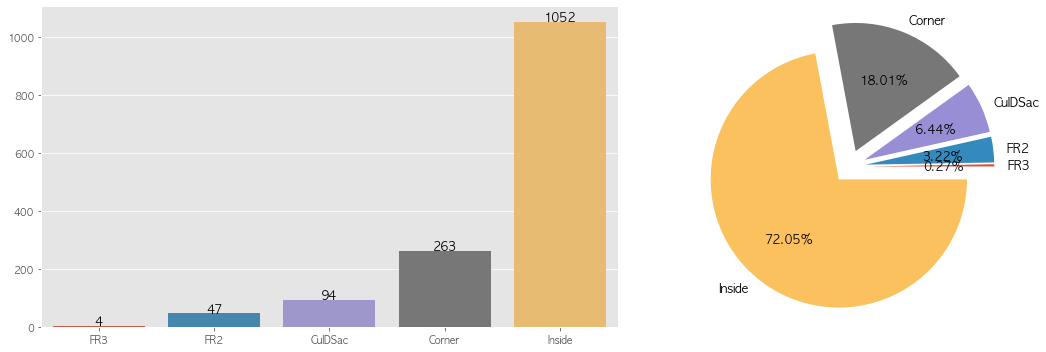

In [34]:
norm_data_check(data = modify_data, feature = 'LotConfig', pie = True)

- **LotConfig** 변수 대부분의 관측치가 **Inside : Inside lot** 범주에 해당된다.


- 변수의 범주에 대한 의미를 살펴보았을 때, 도로와 관련된 변수랑 같이 살펴보는 것이 좋을 듯 하다.

### [9]. LandSlope

**LandSlope** : Slope of property
   
- **Gtl** : Gentle slope (완만한 경사)


- **Mod** : Moderate Slope (중간정도의 경사)   


- **Sev** : Severe Slope (극심한 경사)

Number of null values of LandSlope : 0 

Number of unique values of LandSlope : 3 

Unique values of LandSlope : ['Gtl' 'Mod' 'Sev'] 

The mode of LandSlope : Gtl 



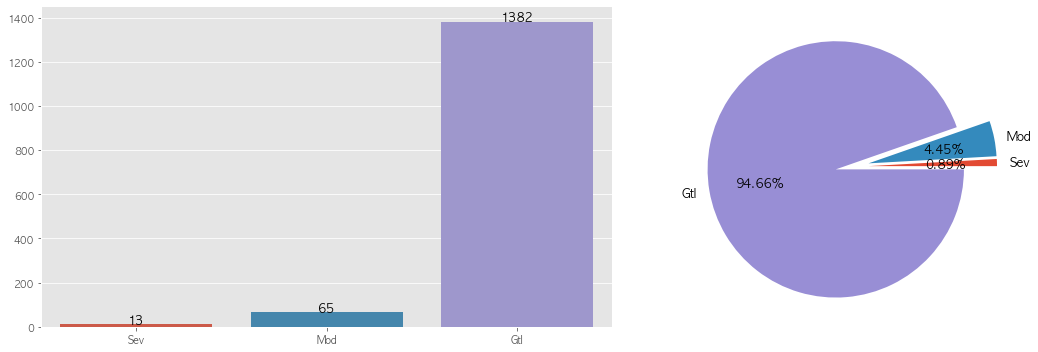

In [35]:
norm_data_check(data = modify_data, feature = 'LandSlope', pie = True)

### [10]. Neighborhood

**Neighborhood** : Physical locations within Ames city limits

- **Blmngtn** : Bloomington Heights


- **Blueste** : Bluestem


- **BrDale** : Briardale


- **BrkSide** : Brookside


- **ClearCr** : Clear Creek


- **CollgCr** : College Creek


- **Crawfor** : Crawford


- **Edwards**: Edwards


- **Gilbert** : Gilbert


- **IDOTRR** : Iowa DOT and Rail Road


- **MeadowV** : Meadow Village


- **Mitchel** : Mitchell


- **Names** : North Ames


- **NoRidge** : Northridge


- **NPkVill** : Northpark Villa


- **NridgHt** : Northridge Heights


- **NWAmes** : Northwest Ames


- **OldTown** : Old Town


- **SWISU** : South & West of Iowa State University


- **Sawyer** : Sawyer


- **SawyerW** : Sawyer West


- **Somerst** : Somerset


- **StoneBr** : Stone Brook


- **Timber** : Timberland


- **Veenker** : Veenker

Number of null values of Neighborhood : 0 

Number of unique values of Neighborhood : 25 

Unique values of Neighborhood : ['Blmngtn' 'Blueste' 'BrDale' 'BrkSide' 'ClearCr' 'CollgCr' 'Crawfor'
 'Edwards' 'Gilbert' 'IDOTRR' 'MeadowV' 'Mitchel' 'NAmes' 'NPkVill'
 'NWAmes' 'NoRidge' 'NridgHt' 'OldTown' 'SWISU' 'Sawyer' 'SawyerW'
 'Somerst' 'StoneBr' 'Timber' 'Veenker'] 

The mode of Neighborhood : NAmes 



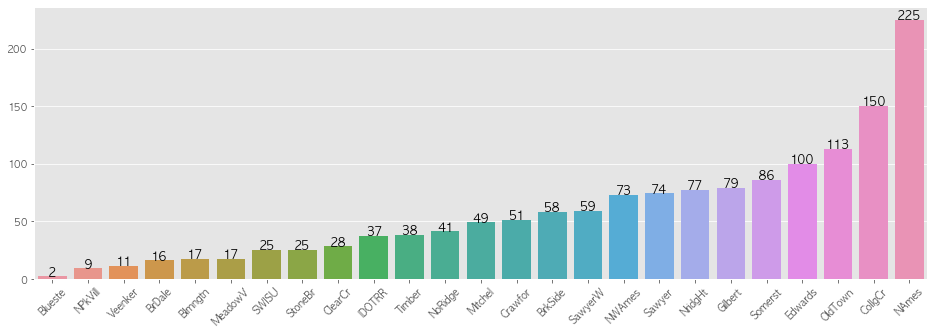

In [36]:
norm_data_check(data = modify_data, feature = 'Neighborhood', pie = False)

### [11]. Condition1 & Condition2

**Condition** : Proximity to various conditions (다양한 조건에 대한 근접성, 조건이 두 개 이상일 경우 Condition2에 기입)

- Artery : Adjacent to arterial street (간선도로 인접)


- Feedr : Adjacent to feeder street    


- Norm : Normal    


- RRNn : Within 200 of North-South Railroad


- RRAn : Adjacent to North-South Railroad


- PosN : Near positive off-site feature--park, greenbelt, etc.


- PosA : Adjacent to postive off-site feature


- RRNe : Within 200' of East-West Railroad


- RRAe : Adjacent to East-West Railroad

Number of null values of Condition1 : 0 

Number of unique values of Condition1 : 9 

Unique values of Condition1 : ['Artery' 'Feedr' 'Norm' 'PosA' 'PosN' 'RRAe' 'RRAn' 'RRNe' 'RRNn'] 

The mode of Condition1 : Norm 



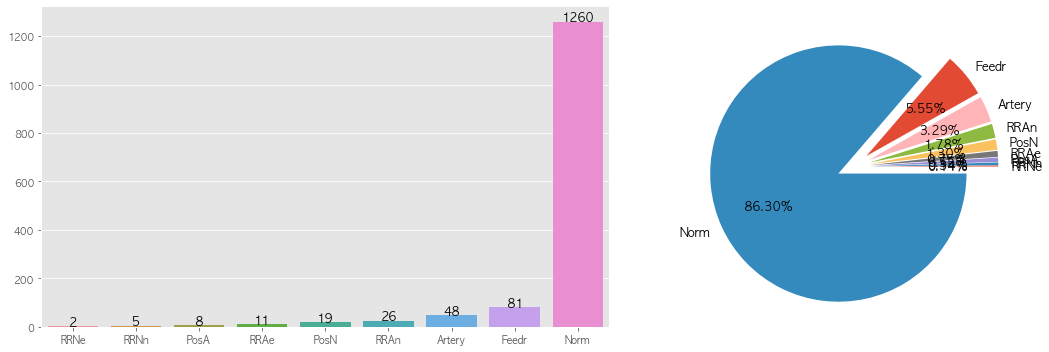

In [37]:
norm_data_check(data = modify_data, feature = 'Condition1', pie = True)

Number of null values of Condition2 : 0 

Number of unique values of Condition2 : 8 

Unique values of Condition2 : ['Artery' 'Feedr' 'Norm' 'PosA' 'PosN' 'RRAe' 'RRAn' 'RRNn'] 

The mode of Condition2 : Norm 



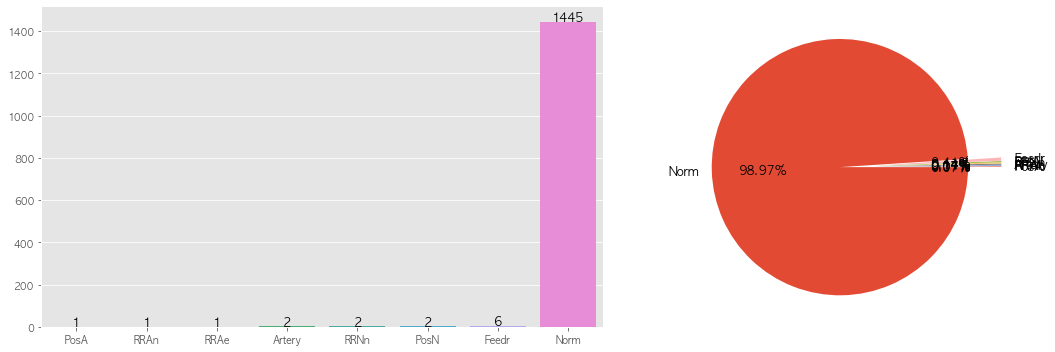

In [38]:
norm_data_check(data = modify_data, feature = 'Condition2', pie = True)

- **Condition1, Condition2** 두 개의 변수에 결측치가 없으며, **Condition2** 변수에는 **RRNe** 범주가 관측되지 않는다.


- 또한, 대부분의 관측치가 **Norm : Normal** 범주에 해당된다.


- 따라서, Condition1, Condition2 변수를 이용하여 근접한 조건의 개수를 나타내주는 **CountCon**라는 변수를 만들어주자.

#### [11-1]. 'CountCon' 변수 생성

In [39]:
# 'CountCon' 변수 생성
print('Shape of modify_data *Before Create* :', modify_data.shape, '\n')

modify_data['CountCon'] = np.nan

for index in modify_data.index:
    
    # 'Condition1'은 'Norm'의 값을 가지지 않고, 'Condition2'는 'Norm'인 경우
    if (modify_data.loc[index, 'Condition1'] != 'Norm') & (modify_data.loc[index, 'Condition2'] == 'Norm'):
        modify_data.loc[index, 'CountCon'] = 1
        
    # 'Condition1'과 'Condition2' 모두 'Norm'이 아닌 경우
    elif (modify_data.loc[index, 'Condition1'] != 'Norm') & (modify_data.loc[index, 'Condition2'] != 'Norm'):
        modify_data.loc[index, 'CountCon'] = 2
    
    # 'Condition1'과 'Condition2' 모두 'Norm'인 경우
    else:
        modify_data.loc[index, 'CountCon'] = 0

print('Shape of modify_data *After Create* :', modify_data.shape, '\n')
print('Unique values of CountCon :', modify_data['CountCon'].unique())

Shape of modify_data *Before Create* : (1460, 82) 

Shape of modify_data *After Create* : (1460, 83) 

Unique values of CountCon : [0. 1. 2.]


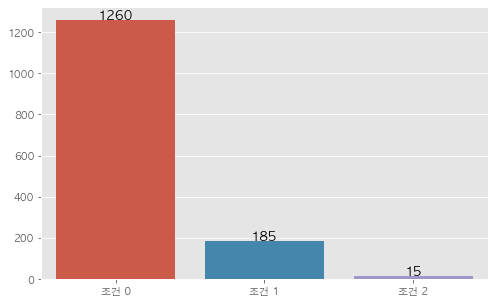

In [40]:
# 'CountCon' 변수 시각화
plt.figure(figsize = (8, 5))

plot_data = pd.DataFrame(modify_data['CountCon'].value_counts().sort_index())

sns.barplot(x = plot_data.index, y = 'CountCon', data = plot_data)
plt.xticks(ticks = [0, 1, 2], labels = ['조건 0', '조건 1', '조건 2'])
plt.ylabel('')

for index, [value] in enumerate(plot_data.values):
    plt.text(index, value, value, ha = 'center', fontsize = 13)

- 조건이 하나도 없는 관측치는 **1260**개, 조건이 하나만 있는 관측치는 **185**개, 조건이 두개인 관측치는 **15**개 이다.

### [12]. BldgType

**BldgType** : Type of dwelling (주거 형태)
    
- **1Fam** : Single-family Detached (단독 주택)


- **2FmCon** : Two-family Conversion; originally built as one-family dwelling (두 가구 주택 : 원래는 단독 한 가구 주택)


- **Duplx** : Duplex (두 세대용 건물, 복층 아파트)


- **TwnhsE** : Townhouse End Unit


- **TwnhsI** : Townhouse Inside Unit

Number of null values of BldgType : 0 

Number of unique values of BldgType : 5 

Unique values of BldgType : ['1Fam' '2fmCon' 'Duplex' 'Twnhs' 'TwnhsE'] 

The mode of BldgType : 1Fam 



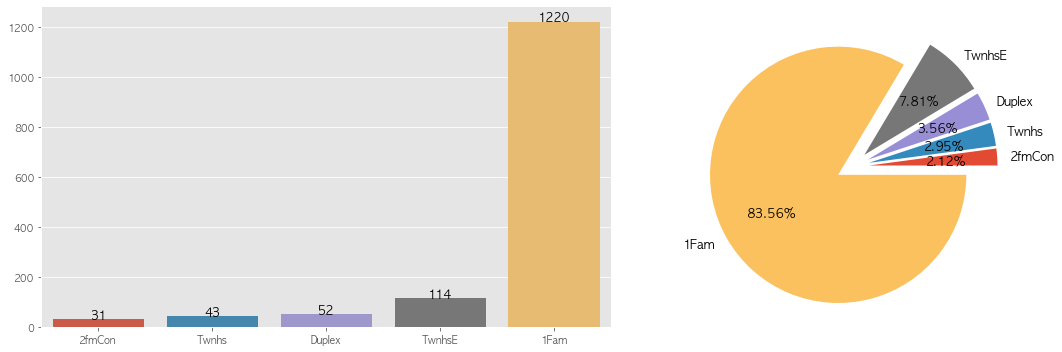

In [41]:
norm_data_check(data = modify_data, feature = 'BldgType', pie = True)

- **BldgType** 변수의 대부분이 **1Fam : Single-family Detached** 범주에 해당된다.

### [13]. HouseStyle

**HouseStyle** : Style of dwelling
    
- **1Story** : One story


- **1.5Fin** : One and one-half story: 2nd level finished


- **1.5Unf** : One and one-half story: 2nd level unfinished


- **2Story** : Two story


- **2.5Fin** : Two and one-half story: 2nd level finished


- **2.5Unf** : Two and one-half story: 2nd level unfinished


- **SFoyer** : Split Foyer


- **SLvl** : Split Level

Number of null values of HouseStyle : 0 

Number of unique values of HouseStyle : 8 

Unique values of HouseStyle : ['1.5Fin' '1.5Unf' '1Story' '2.5Fin' '2.5Unf' '2Story' 'SFoyer' 'SLvl'] 

The mode of HouseStyle : 1Story 



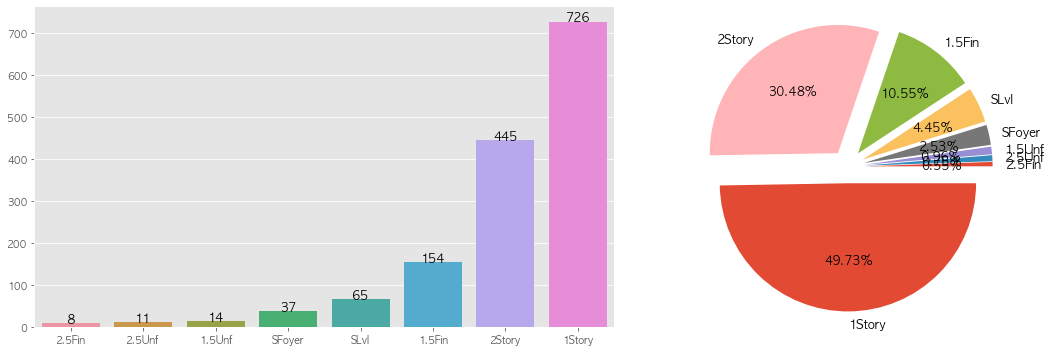

In [42]:
norm_data_check(data = modify_data, feature = 'HouseStyle', pie = True)

### [14]. RoofStyle

**RoofStyle** : Type of roof (지붕의 유형)

- **Flat** : Flat


- **Gable** : Gable


- **Gambrel** : Gabrel (Barn)


- **Hip** : Hip


- **Mansard** : Mansard


- **Shed** : Shed

Number of null values of RoofStyle : 0 

Number of unique values of RoofStyle : 6 

Unique values of RoofStyle : ['Flat' 'Gable' 'Gambrel' 'Hip' 'Mansard' 'Shed'] 

The mode of RoofStyle : Gable 



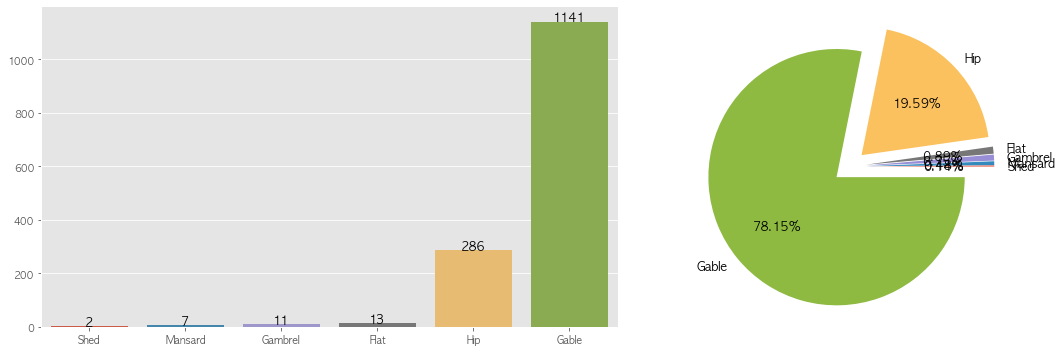

In [43]:
norm_data_check(data = modify_data, feature = 'RoofStyle', pie = True)

- 시각화를 통하여 **Gable** 범주의 관측치가 가장 많으며, 그 다음으로 **Hip** 범주의 관측치가 많다.

### [15]. RoofMatl

**RoofMatl** : Roof material (지붕 재료)
    
- **ClyTile** : Clay or Tile


- **CompShg** : Standard (Composite) Shingle


- **Membran** : Membrane


- **Metal** : Metal


- **Roll** : Roll


- **Tar&Grv** : Gravel & Tar


- **WdShake** : Wood Shakes


- **WdShngl** : Wood Shingles

Number of null values of RoofMatl : 0 

Number of unique values of RoofMatl : 8 

Unique values of RoofMatl : ['ClyTile' 'CompShg' 'Membran' 'Metal' 'Roll' 'Tar&Grv' 'WdShake'
 'WdShngl'] 

The mode of RoofMatl : CompShg 



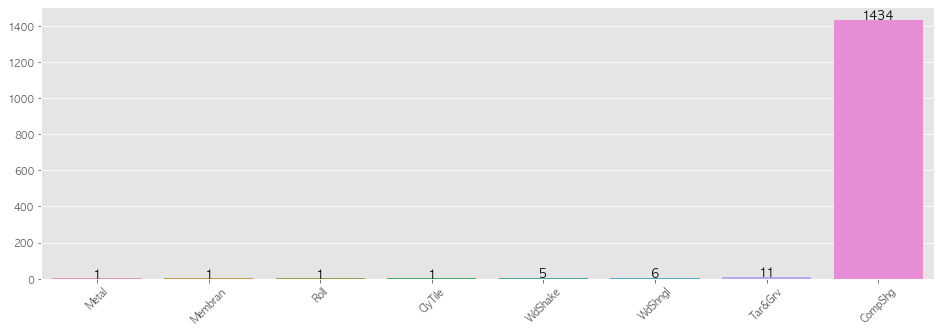

In [44]:
norm_data_check(data = modify_data, feature = 'RoofMatl', pie = False)

- **RoofMatl** 변수의 경우 대부분의 관측치가 **CompShg : Standard (Composite) Shingle** 범주에 해당된다.

In [45]:
# 'RoofStyle'과 'RoofMatl' 교차표
pd.crosstab(modify_data['RoofStyle'], modify_data['RoofMatl']).style.background_gradient(cmap = 'Blues', axis = 1)

RoofMatl,ClyTile,CompShg,Membran,Metal,Roll,Tar&Grv,WdShake,WdShngl
RoofStyle,,,,,,,,
Flat,0,1,1,1,0,10,0,0
Gable,0,1134,0,0,1,1,0,5
Gambrel,0,11,0,0,0,0,0,0
Hip,1,282,0,0,0,0,2,1
Mansard,0,5,0,0,0,0,2,0
Shed,0,1,0,0,0,0,1,0


- **RoofStyle**과 **RoofMatl** 교차표를 통하여, 두 변수 사이에 연관이 없는 것으로 보인다.


- 즉, 지붕의 스타일에 상관없이 지붕의 재료는 대부분 **CompShg : Standard (Composite) Shingle** 재료를 사용한다.

### [16]. Exterior1st & Exterior2nd

**Exterior1st & Exterior2nd** : Exterior covering on house (건물의 외부)

- **AsbShng** : Asbestos Shingles


- **AsphShn** :Asphalt Shingles


- **BrkComm** : Brick Common


- **BrkFace** : Brick Face


- **CBlock** : Cinder Block


- **CemntBd** : Cement Board


- **HdBoard** : Hard Board


- **ImStucc** : Imitation Stucco


- **MetalSd** : Metal Siding


- **Other** : Other


- **Plywood** : Plywood


- **PreCast** : PreCast    


- **Stone** : Stone


- **Stucco** : Stucco


- **VinylSd** :  Vinyl Siding


- **Wd Sdng** :    Wood Siding


- **WdShing** :  Wood Shingles

Number of null values of Exterior1st : 0 

Number of unique values of Exterior1st : 15 

Unique values of Exterior1st : ['AsbShng' 'AsphShn' 'BrkComm' 'BrkFace' 'CBlock' 'CemntBd' 'HdBoard'
 'ImStucc' 'MetalSd' 'Plywood' 'Stone' 'Stucco' 'VinylSd' 'Wd Sdng'
 'WdShing'] 

The mode of Exterior1st : VinylSd 



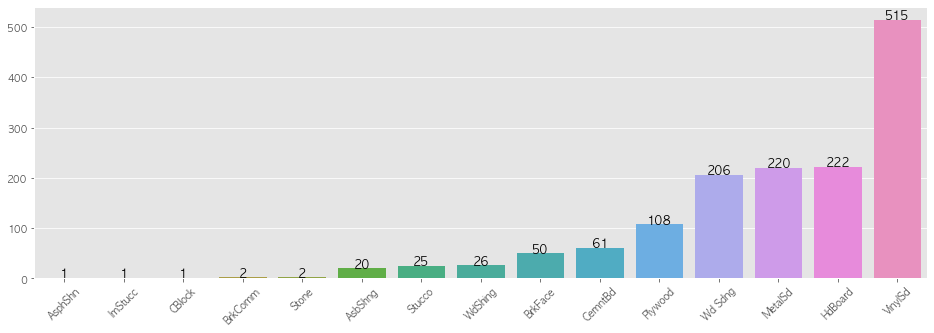

In [46]:
norm_data_check(data = modify_data, feature = 'Exterior1st', pie = False)

Number of null values of Exterior2nd : 0 

Number of unique values of Exterior2nd : 15 

Unique values of Exterior2nd : ['AsbShng' 'AsphShn' 'BrkComm' 'BrkFace' 'CBlock' 'CemntBd' 'HdBoard'
 'ImStucc' 'MetalSd' 'Other' 'Plywood' 'Stone' 'Stucco' 'VinylSd'
 'Wd Sdng'] 

The mode of Exterior2nd : VinylSd 



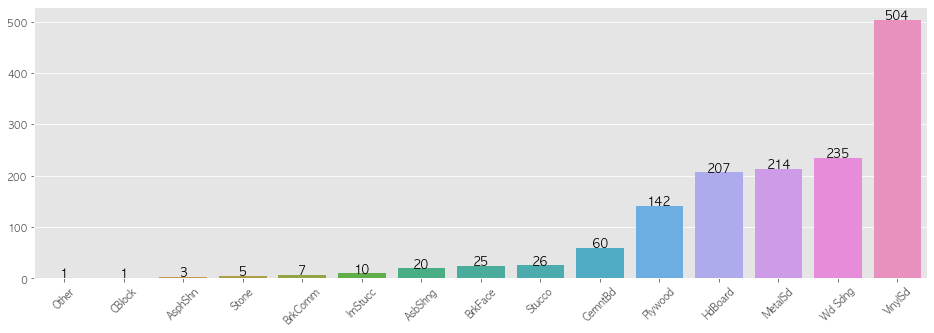

In [47]:
norm_data_check(data = modify_data, feature = 'Exterior2nd', pie = False)

- 시각화를 통해 살펴보면, Exterior1st와 Exterior2nd 모두 **VinylSd : Vinyl Siding** 범주가 가장 많이 관측된다.


- **Exterior1st** 변수에는 **Other, PreCast** 두 개의 범주에 해당되는 관측치가 없다.


- **Exterior2nd** 변수에는 **WdShing, PreCast** 두 개의 범주에 해당되는 관측치가 없다.

In [48]:
# 두 변수의 교차표 확인
pd.crosstab(modify_data['Exterior1st'], modify_data['Exterior2nd']).style.background_gradient(cmap = 'Greens', axis = 1)

Exterior2nd,AsbShng,AsphShn,BrkComm,BrkFace,CBlock,CemntBd,HdBoard,ImStucc,MetalSd,Other,Plywood,Stone,Stucco,VinylSd,Wd Sdng
Exterior1st,,,,,,,,,,,,,,,
AsbShng,17,0,0,0,0,0,0,0,0,0,2,0,1,0,0
AsphShn,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
BrkComm,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0
BrkFace,1,0,0,24,0,0,3,0,0,0,6,2,1,0,13
CBlock,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
CemntBd,0,0,0,0,0,59,0,0,0,0,0,0,0,0,2
HdBoard,0,1,0,0,0,0,193,2,1,0,23,0,0,0,2
ImStucc,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
MetalSd,0,1,0,0,0,0,3,0,212,0,0,0,1,0,3


- 두 변수 사이의 교차표를 통해 보면, 대부분의 관측치가 같은 재료를 사용하고 있다.


- 위의 결과를 바탕으로 똑같은 재료를 사용했으면 1, 그렇지 않으면 0을 의미하는 **SameExterior** 변수를 만들어주자.

#### [16-1]. 'SameExterior' 변수 생성

In [50]:
# 'SameExterior' 변수 생성
print('Shape of modify_data *Before Create* :', modify_data.shape, '\n')

modify_data['SameExterior'] = np.nan

for index in modify_data.index:
    
    first_exterior = modify_data.loc[index, 'Exterior1st']
    second_exterior = modify_data.loc[index, 'Exterior2nd']
    
    if first_exterior == second_exterior:
        modify_data.loc[index, 'SameExterior'] = 1
    
    else:
        modify_data.loc[index, 'SameExterior'] = 0
        
print('Shape of modify_data *After Create* :', modify_data.shape, '\n')
print('Unique vlaues of SameExterior :', modify_data['SameExterior'].unique())

Shape of modify_data *Before Create* : (1460, 83) 

Shape of modify_data *After Create* : (1460, 84) 

Unique vlaues of SameExterior : [1. 0.]


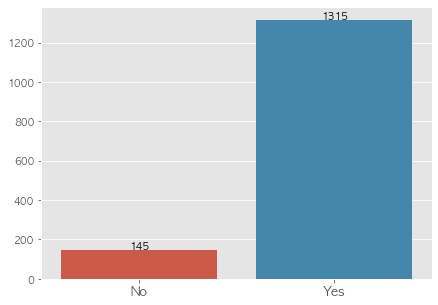

In [53]:
# 'SameExterior' 변수 시각화
plt.figure(figsize = (7, 5))

plot_data = pd.DataFrame(modify_data['SameExterior'].value_counts().sort_index())

sns.barplot(x = plot_data.index, y = 'SameExterior', data = plot_data)
plt.xticks(ticks = [0, 1], labels = ['No', 'Yes'], fontsize = 13)
plt.ylabel('')

for index, [value] in enumerate(plot_data.values):
    plt.text(index, value, value, ha = 'center', fontsize = 10)
    
plt.show()

- 똑같은 외부 재료를 사용한 관측치는 1315개, 그렇지 않은 관측치는 145개 이다.

### [17]. MasVnrType

**MasVnrType** : Masonry veneer type (Masonry veneer 유형)
    
- **BrkCmn** : Brick Common


- **BrkFace** : Brick Face


- **CBlock** : Cinder Block


- **None** : None


- **Stone** : Stone

Number of null values of MasVnrType : 0 

Number of unique values of MasVnrType : 4 

Unique values of MasVnrType : ['BrkCmn' 'BrkFace' 'None' 'Stone'] 

The mode of MasVnrType : None 



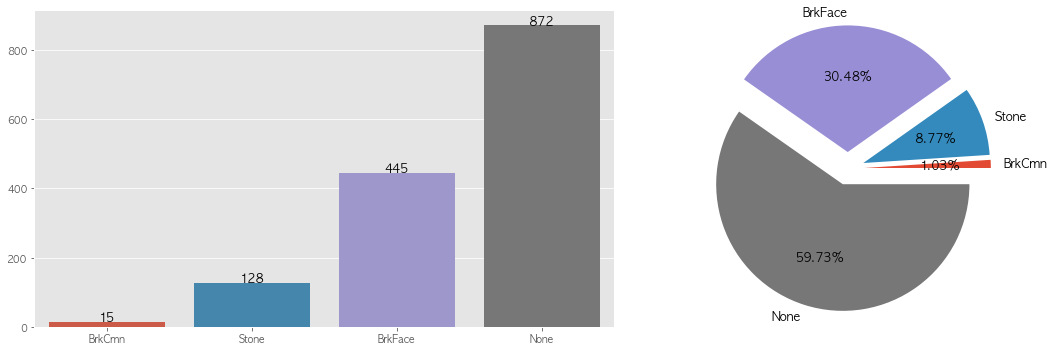

In [54]:
norm_data_check(data = modify_data, feature = 'MasVnrType', pie = True)

- **MasVnrType** 변수에는 8개의 결측치가 있으며, Masonry veneer이 없는 관측치가 **864**개로 가장 많다.

### [18]. Foundation

**Foundation** : Type of foundation (건물의 토대 유형)

- **BrkTil** : Brick & Tile


- **CBlock** : Cinder Block


- **PConc** : Poured Contrete    


- **Slab** : Slab


- **Stone** : Stone


- **Wood** : Wood

Number of null values of Foundation : 0 

Number of unique values of Foundation : 6 

Unique values of Foundation : ['BrkTil' 'CBlock' 'PConc' 'Slab' 'Stone' 'Wood'] 

The mode of Foundation : PConc 



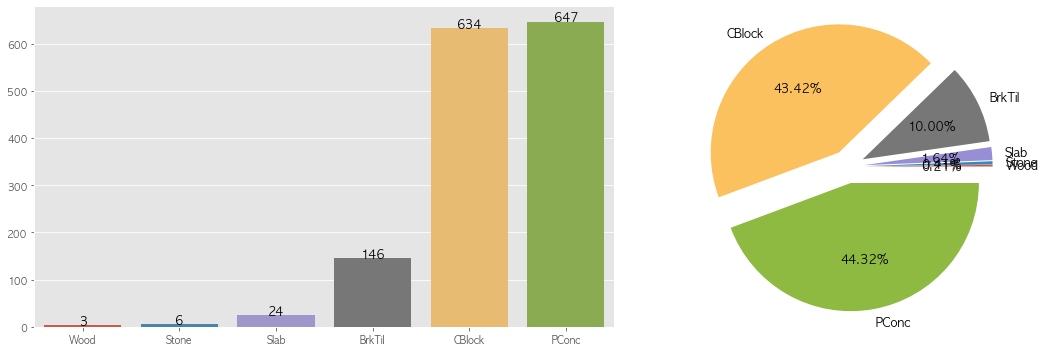

In [55]:
norm_data_check(data = modify_data, feature = 'Foundation', pie = True)

- **Foundataion** 변수에서는 **PConc : Poured Contrete, CBlock : Cinder Block** 두 범주가 대부분을 차지하고 있다.

### [19]. BsmtExposure

**BsmtExposure** : Refers to walkout or garden level walls

- **Gd** : Good Exposure


- **Av** : Average Exposure (split levels or foyers typically score average or above)    


- **Mn** : Mimimum Exposure


- **No** : No Exposure


- **NA** : No Basement

Number of null values of BsmtExposure : 0 

Number of unique values of BsmtExposure : 5 

Unique values of BsmtExposure : ['Av' 'Gd' 'Mn' 'No' 'No have'] 

The mode of BsmtExposure : No 



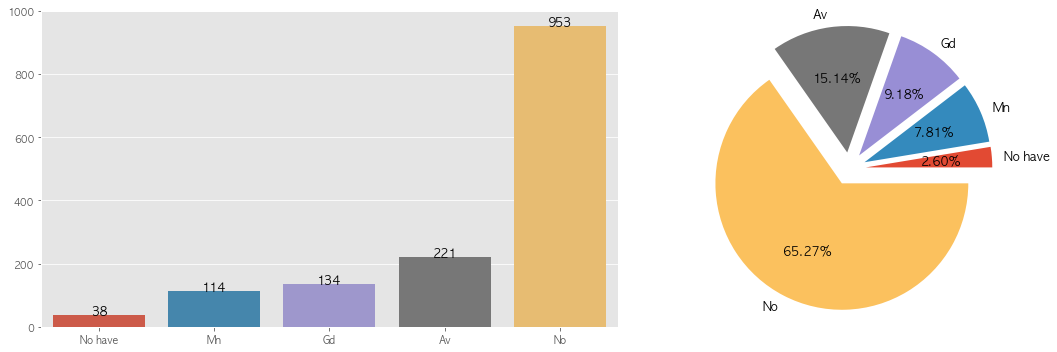

In [56]:
norm_data_check(data = modify_data, feature = 'BsmtExposure', pie = True)

### [20]. BsmtFinType1 & BsmtFinType2

**BsmtFinType1** : Rating of basement finished area
    
**BsmtFinType2** : Rating of basement finished area (if multiple types)
 
- **GLQ** : Good Living Quarters


- **ALQ** : Average Living Quarters


- **BLQ** : Below Average Living Quarters    


- **Rec** : Average Rec Room


- **LwQ** : Low Quality


- **Unf** : Unfinshed


- **NA** : No Basement

Number of null values of BsmtFinType1 : 0 

Number of unique values of BsmtFinType1 : 7 

Unique values of BsmtFinType1 : ['ALQ' 'BLQ' 'GLQ' 'LwQ' 'No have' 'Rec' 'Unf'] 

The mode of BsmtFinType1 : Unf 



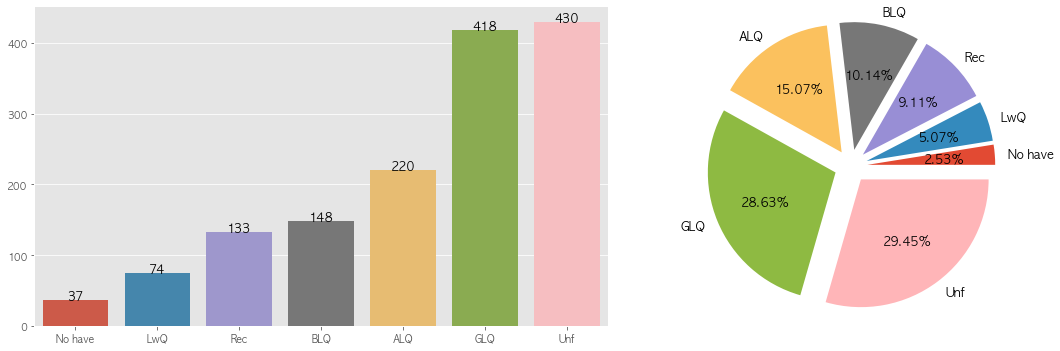

In [57]:
norm_data_check(data = modify_data, feature = 'BsmtFinType1', pie = True)

Number of null values of BsmtFinType2 : 0 

Number of unique values of BsmtFinType2 : 7 

Unique values of BsmtFinType2 : ['ALQ' 'BLQ' 'GLQ' 'LwQ' 'No have' 'Rec' 'Unf'] 

The mode of BsmtFinType2 : Unf 



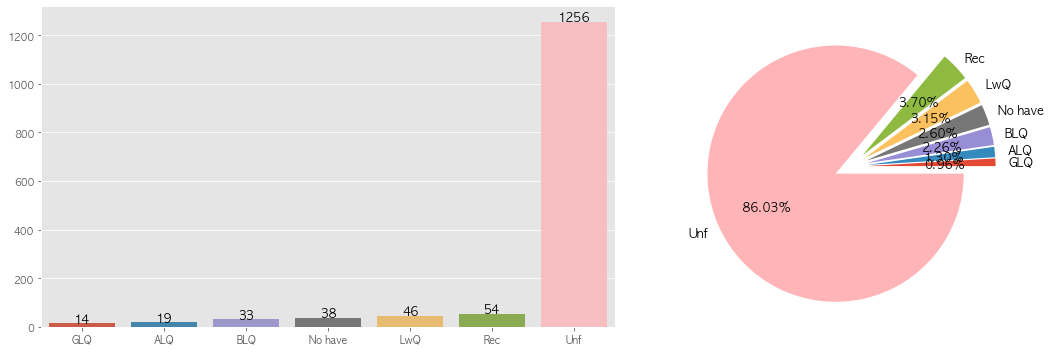

In [58]:
norm_data_check(data = modify_data, feature = 'BsmtFinType2', pie = True)

- **BsmtFinType1, BsmtFinType2** 두 변수 모두 **Unf : Unfinshed** 범주가 가장 많으며, BsmtFinType2 변수의 경우 대분의 관측치가 Unf 범주에 해당된다.


- 후에 분석을 수행할 때, **BsmtType2** 변수를 이용하여 **Finished, Unfinished, No have** 를 의미하는 변수를 만들어보자.

### [21]. Heating

**Heating** : Type of heating

- **Floor** : Floor Furnace


- **GasA** : Gas forced warm air furnace


- **GasW** : Gas hot water or steam heat


- **Grav** : Gravity furnace    


- **OthW** : Hot water or steam heat other than gas


- **Wall** : Wall furnace

Number of null values of Heating : 0 

Number of unique values of Heating : 6 

Unique values of Heating : ['Floor' 'GasA' 'GasW' 'Grav' 'OthW' 'Wall'] 

The mode of Heating : GasA 



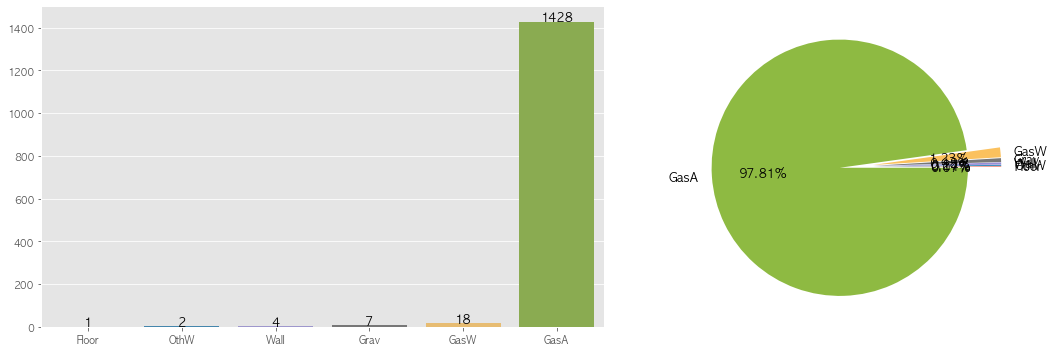

In [59]:
norm_data_check(data = modify_data, feature = 'Heating', pie = True)

- 대부분의 관측치가 **GasA : Gas forced warm air furnace**에 해당되며, 분석에 도움이 되지 않을 것으로 판단된다.

### [22]. CentralAir

**CentralAir** : Central air conditioning

- **N** : No


- **Y** : Yes

Number of null values of CentralAir : 0 

Number of unique values of CentralAir : 2 

Unique values of CentralAir : ['N' 'Y'] 

The mode of CentralAir : Y 



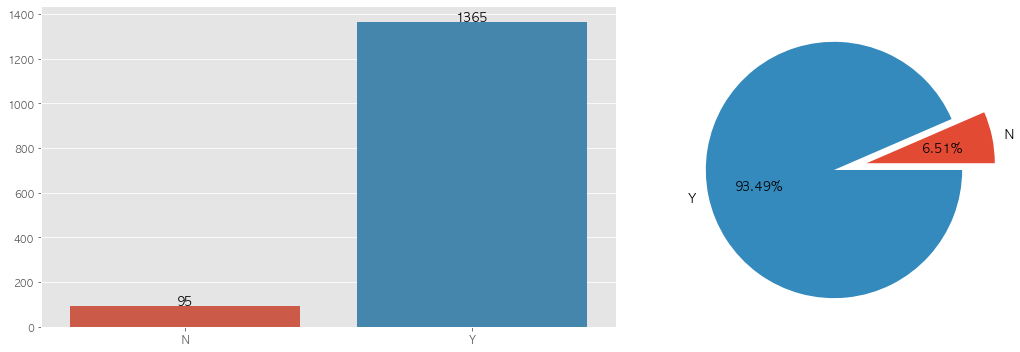

In [60]:
norm_data_check(data = modify_data, feature = 'CentralAir', pie = True)

### [23]. Electrical

**Electrical** : Electrical system

- **SBrkr** : Standard Circuit Breakers & Romex


- **FuseA** : Fuse Box over 60 AMP and all Romex wiring (Average)    


- **FuseF** : 60 AMP Fuse Box and mostly Romex wiring (Fair)


- **FuseP** : 60 AMP Fuse Box and mostly knob & tube wiring (poor)


- **Mix** : Mixed

Number of null values of Electrical : 0 

Number of unique values of Electrical : 5 

Unique values of Electrical : ['FuseA' 'FuseF' 'FuseP' 'Mix' 'SBrkr'] 

The mode of Electrical : SBrkr 



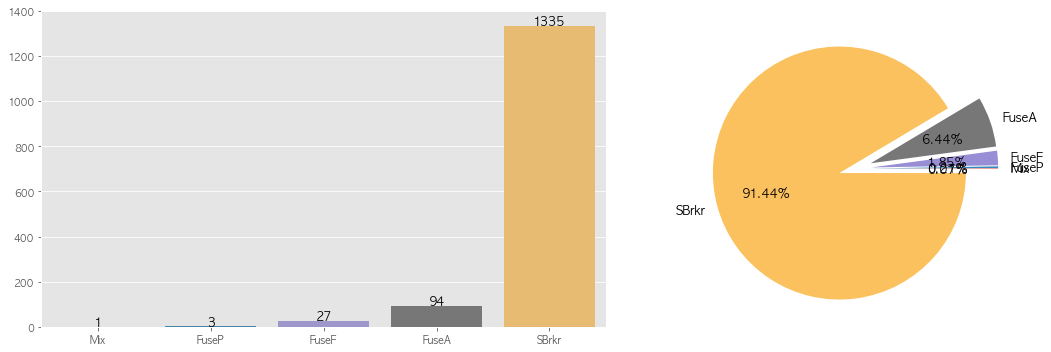

In [61]:
norm_data_check(data = modify_data, feature = 'Electrical', pie = True)

- **Electrical** 변수의 경우 1개의 결측치가 있으며, 최빈값으로 대체해주도록 하자.

### [24]. Functional

**Functional** : Home functionality (Assume typical unless deductions are warranted)

- **Typ** : Typical Functionality



- **Min1** : Minor Deductions 1



- **Min2** : Minor Deductions 2



- **Mod** : Moderate Deductions



- **Maj1** : Major Deductions 1



- **Maj2** : Major Deductions 2



- **Sev** : Severely Damaged



- **Sal** : Salvage only

Number of null values of Functional : 0 

Number of unique values of Functional : 7 

Unique values of Functional : ['Maj1' 'Maj2' 'Min1' 'Min2' 'Mod' 'Sev' 'Typ'] 

The mode of Functional : Typ 



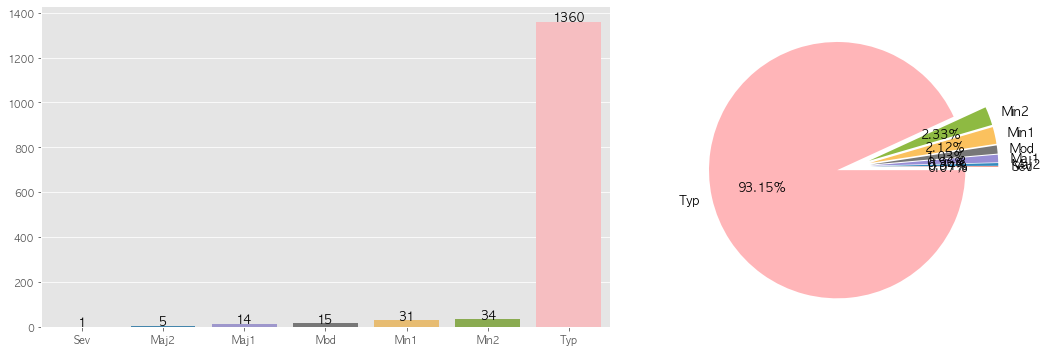

In [62]:
norm_data_check(data = modify_data, feature = 'Functional', pie = True)

### [25]. GarageType

**GarageType** : Garage location

- **2Types** : More than one type of garage


- **Attchd** : Attached to home


- **Basment** : Basement Garage


- **BuiltIn** : Built-In (Garage part of house - typically has room above garage)


- **CarPort** : Car Port


- **Detchd** : Detached from home


- **NA** : No Garage

Number of null values of GarageType : 0 

Number of unique values of GarageType : 7 

Unique values of GarageType : ['2Types' 'Attchd' 'Basment' 'BuiltIn' 'CarPort' 'Detchd' 'No have'] 

The mode of GarageType : Attchd 



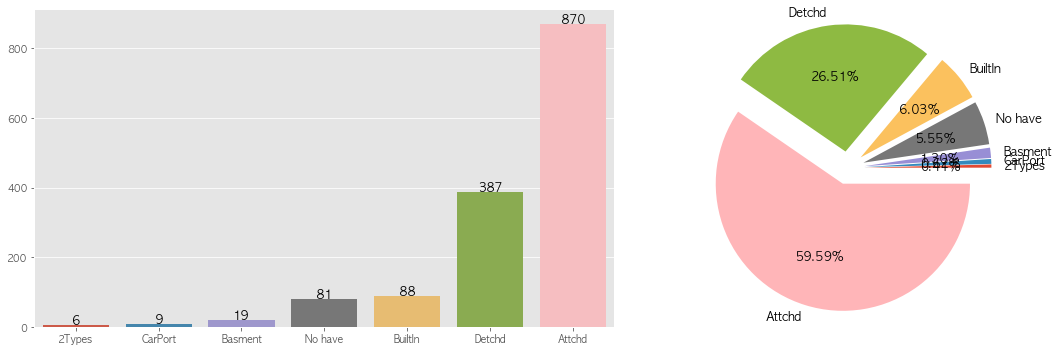

In [63]:
norm_data_check(data = modify_data, feature = 'GarageType', pie = True)

### [26]. GarageFinish

**GarageFinish** : Interior finish of the garage (차고의 내부 마감)

- **Fin** : Finished


- **RFn** : Rough Finished    


- **Unf** : Unfinished


- **NA** : No Garage

Number of null values of GarageFinish : 0 

Number of unique values of GarageFinish : 4 

Unique values of GarageFinish : ['Fin' 'No have' 'RFn' 'Unf'] 

The mode of GarageFinish : Unf 



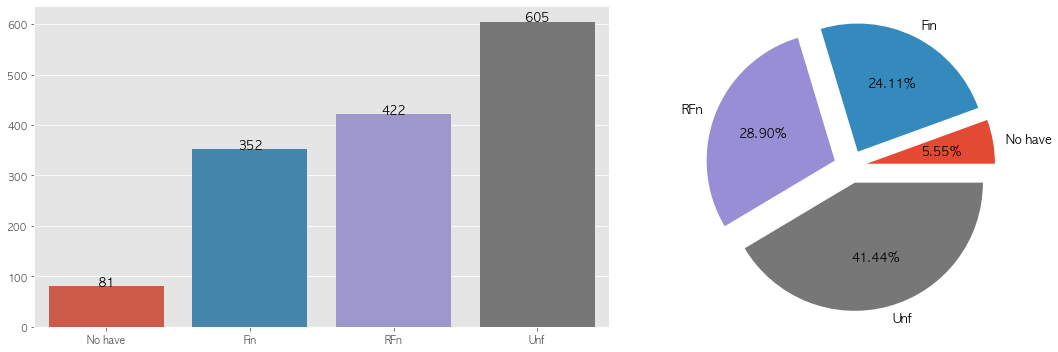

In [64]:
norm_data_check(data = modify_data, feature = 'GarageFinish', pie = True)

### [27]. PavedDrive

**PavedDrive** : Paved driveway (진입로의 포장여부)


- **Y** : Paved 


- **P** : Partial Pavement


- **N** : Dirt/Gravel

Number of null values of PavedDrive : 0 

Number of unique values of PavedDrive : 3 

Unique values of PavedDrive : ['N' 'P' 'Y'] 

The mode of PavedDrive : Y 



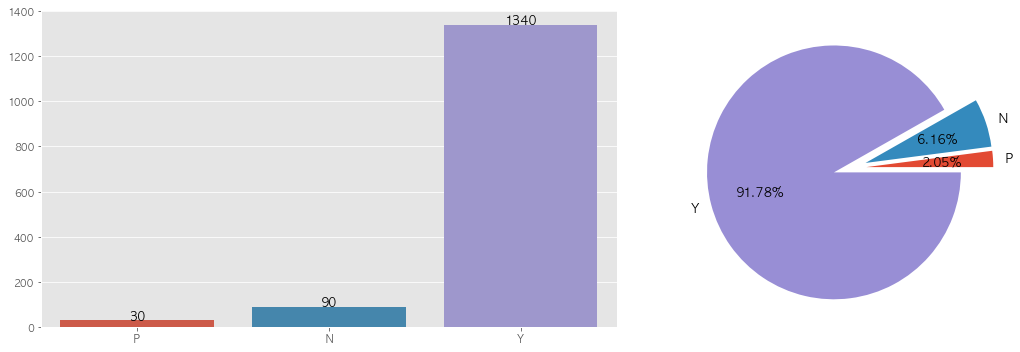

In [65]:
norm_data_check(data = modify_data, feature = 'PavedDrive', pie = True)

### [28]. Fence

**Fence** : Fence quality (울타리 품질)

- **GdPrv** : Good Privacy


- **MnPrv** : Minimum Privacy


- **GdWo** : Good Wood


- **MnWw** : Minimum Wood/Wire


- **NA** : No Fence

Number of null values of Fence : 0 

Number of unique values of Fence : 5 

Unique values of Fence : ['GdPrv' 'GdWo' 'MnPrv' 'MnWw' 'No have'] 

The mode of Fence : No have 



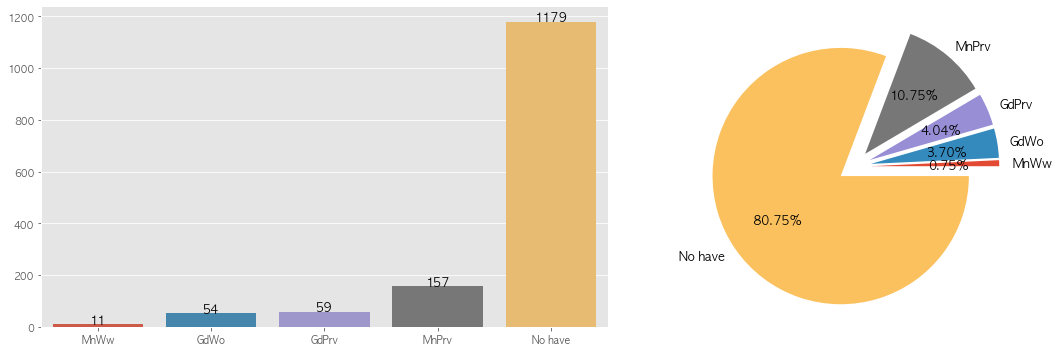

In [66]:
norm_data_check(data = modify_data, feature = 'Fence', pie = True)

- Fence를 보유하고 있지 않은 관측치가 **1179**개로 대부분의 집에서 Fence를 보유하고 있지 않는다.


- 따라서, 품질에 대한 평가보다는 Fence 여부를 나타내는 변수를 만들어 주면 어떨까?


- 집의 가격을 측정하는 부분에서 **안전성**도 중요하다고 생각하기 때문에, **Fence** 변수와 다른 변수를 이용하여 안전성을 의미하는 변수를 만들어 주자.

### [29]. MiscFeature

**MiscFeature** : Miscellaneous feature not covered in other categories (다른 변수들에서 다루지 않는 기타 기능)

- **Elev** : Elevator


- **Gar2** : 2nd Garage (if not described in garage section)


- **Othr** : Other


- **Shed** : Shed (over 100 SF) (헛간)


- **TenC** : Tennis Court


- **NA** : None

Number of null values of MiscFeature : 0 

Number of unique values of MiscFeature : 5 

Unique values of MiscFeature : ['Gar2' 'No have' 'Othr' 'Shed' 'TenC'] 

The mode of MiscFeature : No have 



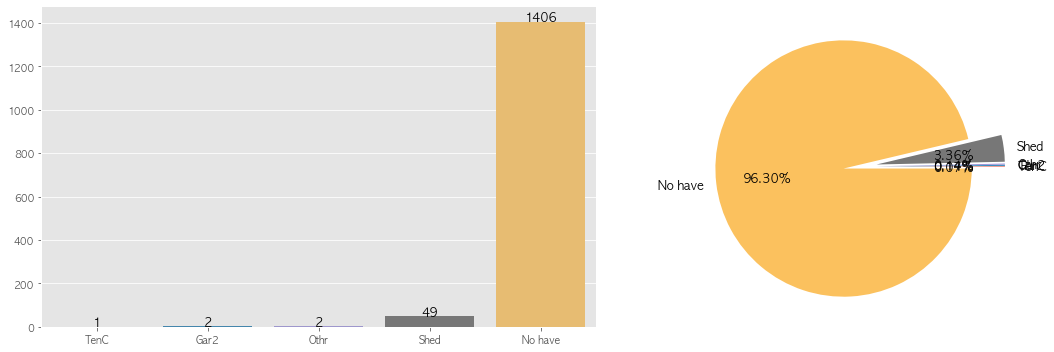

In [67]:
norm_data_check(data = modify_data, feature = 'MiscFeature', pie = True)

- 대부분의 관측치에서 추가적인 기능은 다루지 않는다는 것을 볼 수 있다.

### [30]. SaleType

**SaleType** : Type of sale (판매 유형)

- **WD** : Warranty Deed - Conventional


- **CWD** : Warranty Deed - Cash


- **VWD** : Warranty Deed - VA Loan


- **New** : Home just constructed and sold


- **COD** : Court Officer Deed/Estate


- **Con** : Contract 15% Down payment regular terms


- **ConLw** : Contract Low Down payment and low interest


- **ConLI** : Contract Low Interest


- **ConLD** : Contract Low Down


- **Oth** : Other

Number of null values of SaleType : 0 

Number of unique values of SaleType : 9 

Unique values of SaleType : ['COD' 'CWD' 'Con' 'ConLD' 'ConLI' 'ConLw' 'New' 'Oth' 'WD'] 

The mode of SaleType : WD 



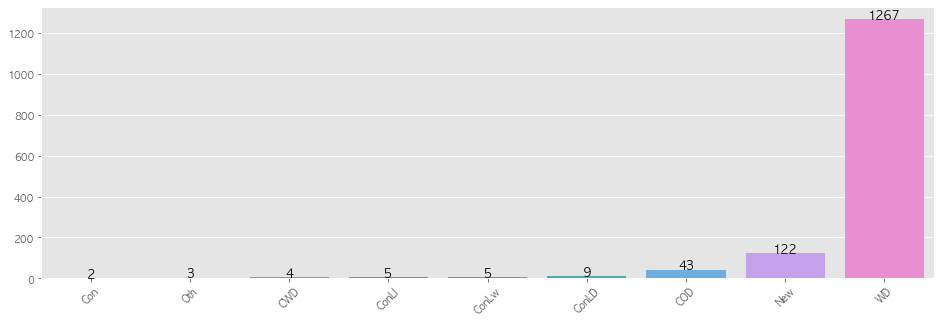

In [68]:
norm_data_check(data = modify_data, feature = 'SaleType', pie = False)

- **SaleType** 변수에 총 10개의 범주가 존재하는데, **VWD** 범주를 제외한 9개의 범주만 관측된다.

### [31]. SaleCondition

**SaleCondition** : Condition of sale
  
- **Normal** : Normal Sale


- **Abnorml** : Abnormal Sale -  trade, foreclosure, short sale


- **AdjLand** : Adjoining Land Purchase


- **Alloca** : Allocation - two linked properties with separate deeds, typically condo with a garage unit    


- **Family** : Sale between family members


- **Partial** : Home was not completed when last assessed (associated with New Homes)

Number of null values of SaleCondition : 0 

Number of unique values of SaleCondition : 6 

Unique values of SaleCondition : ['Abnorml' 'AdjLand' 'Alloca' 'Family' 'Normal' 'Partial'] 

The mode of SaleCondition : Normal 



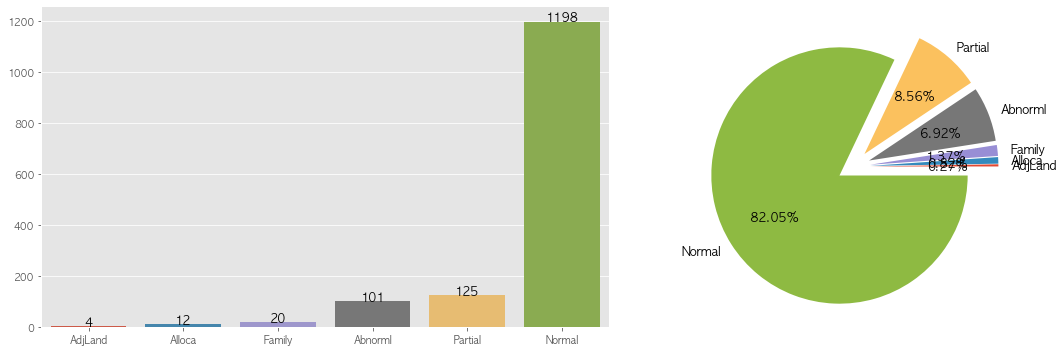

In [69]:
norm_data_check(data = modify_data, feature = 'SaleCondition', pie = True)

## 4.2. 순서형 변수 (Ordinal Variable)

In [71]:
or_list = ['OverallQual', 'OverallCond', 'ExterQual', 'ExterCond', 'BsmtQual', 'BsmtCond', 'HeatingQC',
           'KitchenQual', 'FireplaceQu', 'GarageQual', 'GarageCond', 'PoolQC', 'YearBuilt', 'YearRemodAdd',
           'GarageYrBlt', 'MoSold', 'YrSold']
print('Number of ordinal variable :', len(or_list), '\n')

# 순서형 변수의 데이터만 추출
or_data = modify_data[or_list]

# 데이터의 일부분 확인
display(or_data.head())

Number of ordinal variable : 17 



,OverallQual,OverallCond,ExterQual,ExterCond,BsmtQual,BsmtCond,HeatingQC,KitchenQual,FireplaceQu,GarageQual,GarageCond,PoolQC,YearBuilt,YearRemodAdd,GarageYrBlt,MoSold,YrSold
0,7,5,Gd,TA,Gd,TA,Ex,Gd,No have,TA,TA,No have,2003,2003,2003.0,2,2008
1,6,8,TA,TA,Gd,TA,Ex,TA,TA,TA,TA,No have,1976,1976,1976.0,5,2007
2,7,5,Gd,TA,Gd,TA,Ex,Gd,TA,TA,TA,No have,2001,2002,2001.0,9,2008
3,7,5,TA,TA,TA,Gd,Gd,Gd,Gd,TA,TA,No have,1915,1970,1998.0,2,2006
4,8,5,Gd,TA,Gd,TA,Ex,Gd,TA,TA,TA,No have,2000,2000,2000.0,12,2008


In [72]:
# 순서형 변수를 탐색하는 함수 만들기
def or_data_check(data = modify_data, feature = 'OverallQual'):
    
    print('Number of unique values of {} :'.format(feature), len(data[feature].unique()), '\n')
    print('Unique values of {} :'.format(feature), np.sort(data[feature].unique()), '\n')
    
    # 최빈값 확인
    print('The mode of {} :'.format(feature), data[feature].mode()[0])
    
    # 순서형 변수의 경우는 Bar Plot만 그리도록 하자.
    plt.figure(figsize = (14, 5))
    
    plot_data = pd.DataFrame(data[feature].value_counts().sort_index())
    
    sns.barplot(x = plot_data.index, y = feature, data = plot_data)
    plt.ylabel('')
    
    for index, [value] in enumerate(plot_data.values):
        plt.text(index, value, value, ha = 'center', fontsize = 13)
        
    plt.show()

### [1]. OverallQual & OverallCond

**OverallQual** : Rates the overall material and finish of the house (집의 전체적인 소재 및 마감 품질 평가)
    
**OverallCond** : Rates the overall condition of the house (집의 전체적인 상태를 평가)

- **10** : Very Excellent


- **9** : Excellent


- **8** : Very Good


- **7** : Good


- **6** : Above Average


- **5** : Average


- **4** : Below Average


- **3** : Fair


- **2** : Poor


- **1** : Very Poor

Number of unique values of OverallQual : 10 

Unique values of OverallQual : [ 1  2  3  4  5  6  7  8  9 10] 

The mode of OverallQual : 5 

Number of unique values of OverallCond : 9 

Unique values of OverallCond : [1 2 3 4 5 6 7 8 9] 

The mode of OverallCond : 5


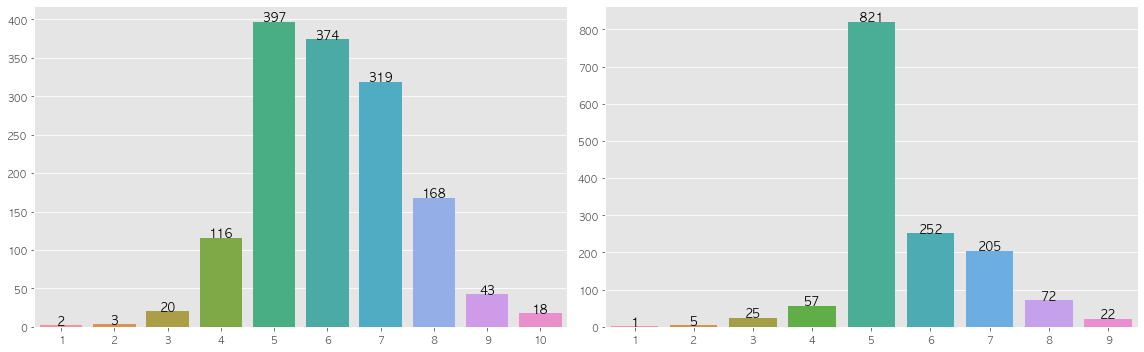

In [73]:
print('Number of unique values of OverallQual :', len(modify_data['OverallQual'].unique()), '\n')
print('Unique values of OverallQual :', np.sort(modify_data['OverallQual'].unique()), '\n')
print('The mode of OverallQual :', modify_data['OverallQual'].mode()[0], '\n')

print('Number of unique values of OverallCond :', len(modify_data['OverallCond'].unique()), '\n')
print('Unique values of OverallCond :', np.sort(modify_data['OverallCond'].unique()), '\n')
print('The mode of OverallCond :', modify_data['OverallCond'].mode()[0])

fig, axes = plt.subplots(ncols = 2, figsize = (16, 5))

# 'OverallQual'
plot_data = pd.DataFrame(modify_data['OverallQual'].value_counts().sort_index())

sns.barplot(x = plot_data.index, y = 'OverallQual', data = plot_data, ax = axes[0])
axes[0].set_ylabel('')

for index, [value] in enumerate(plot_data.values):
    axes[0].text(index, value, value, ha = 'center', fontsize = 12)

# 'OverallCond'
plot_data = pd.DataFrame(modify_data['OverallCond'].value_counts().sort_index())

sns.barplot(x = plot_data.index, y = 'OverallCond', data = plot_data, ax = axes[1])
axes[1].set_ylabel('')

for index, [value] in enumerate(plot_data.values):
    axes[1].text(index, value, value, ha = 'center', fontsize = 12)
    
fig.tight_layout()

- 두 변수 모두 **5 : Average** 범주에 가장 많은 응답이 관측된다.


- 부정적인 평가보다는 긍정적인 평가가 많음을 볼 수 있다.

### [2]. ExterQual & ExterCond

**ExterQual** : Evaluates the quality of the material on the exterior (외부 소재 품질에 대한 평가)

**ExterCond** : Evaluates the present condition of the material on the exterior (외부 소재의 현재 상태에 대한 평가)

- **Ex** : Excellent


- **Gd** : Good


- **TA** : Average/Typical


- **Fa** : Fair


- **Po** : Poor

Number of unique values of ExterQual : 4 

Unique values of ExterQual : ['Ex' 'Fa' 'Gd' 'TA'] 

The mode of ExterQual : TA 

Number of unique values of ExterCond : 5 

Unique values of ExterCond : ['Ex' 'Fa' 'Gd' 'Po' 'TA'] 

The mode of ExterCond : TA


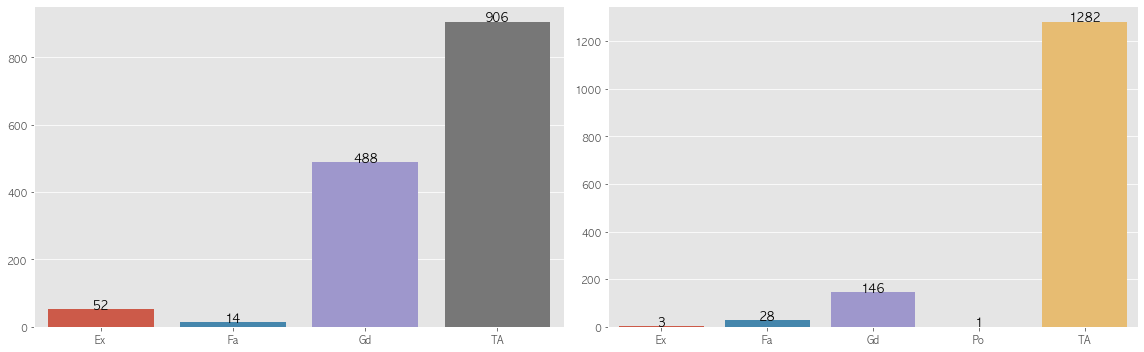

In [74]:
print('Number of unique values of ExterQual :', len(modify_data['ExterQual'].unique()), '\n')
print('Unique values of ExterQual :', np.sort(modify_data['ExterQual'].unique()), '\n')
print('The mode of ExterQual :', modify_data['ExterQual'].mode()[0], '\n')

print('Number of unique values of ExterCond :', len(modify_data['ExterCond'].unique()), '\n')
print('Unique values of ExterCond :', np.sort(modify_data['ExterCond'].unique()), '\n')
print('The mode of ExterCond :', modify_data['ExterCond'].mode()[0])

fig, axes = plt.subplots(ncols = 2, figsize = (16, 5))

# 'ExterQual'
plot_data = pd.DataFrame(modify_data['ExterQual'].value_counts().sort_index())

sns.barplot(x = plot_data.index, y = 'ExterQual', data = plot_data, ax = axes[0])
axes[0].set_ylabel('')

for index, [value] in enumerate(plot_data.values):
    axes[0].text(index, value, value, ha = 'center', fontsize = 12)

# 'ExterCond'
plot_data = pd.DataFrame(modify_data['ExterCond'].value_counts().sort_index())

sns.barplot(x = plot_data.index, y = 'ExterCond', data = plot_data, ax = axes[1])
axes[1].set_ylabel('')

for index, [value] in enumerate(plot_data.values):
    axes[1].text(index, value, value, ha = 'center', fontsize = 12)
    
fig.tight_layout()

- **ExterQual, ExterCond** 두 변수도 마찬가지로 중간 범주에 해당하는 응답이 가장 많다.


- 또한, 마찬가지로 부정적인 평가보다 긍정적인 평가가 많이 관측됨을 볼 수 있다.

### [3]. BsmtQual & BsmtCond

**BsmtQual** : Evaluates the height of the basement (지하실 높이 평가)
    
- **Ex** : Excellent (100+ inches)    


- **Gd** : Good (90-99 inches)


- **TA** : Typical (80-89 inches)


- **Fa** : Fair (70-79 inches)


- **Po** : Poor (<70 inches)


- **NA** : No Basement


**BsmtCond** : Evaluates the general condition of the basement (지하실의 전반적인 상태 평가)

- **Ex** : Excellent


- **Gd** : Good


- **TA** : Typical - slight dampness allowed (약간의 습기)


- **Fa** : Fair - dampness or some cracking or settling (습기 또는 약간의 균열 또는 정착)


- **Po** : Poor - Severe cracking, settling, or wetness (심한 균열, 안착 또는 습기)


- **NA** : No Basement

Number of unique values of BsmtQual : 5 

Unique values of BsmtQual : ['Ex' 'Fa' 'Gd' 'No have' 'TA'] 

The mode of BsmtQual : TA 

Number of unique values of BsmtCond : 5 

Unique values of BsmtCond : ['Fa' 'Gd' 'No have' 'Po' 'TA'] 

The mode of BsmtCond : TA


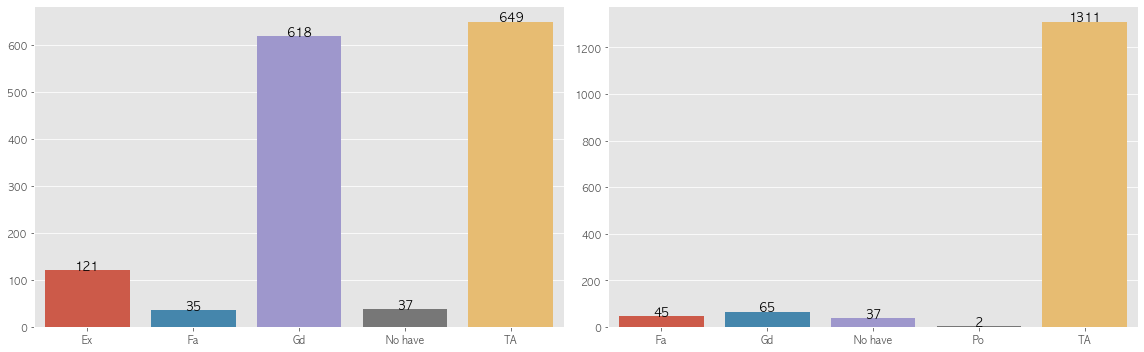

In [75]:
print('Number of unique values of BsmtQual :', len(modify_data['BsmtQual'].unique()), '\n')
print('Unique values of BsmtQual :', np.sort(modify_data['BsmtQual'].unique()), '\n')
print('The mode of BsmtQual :', modify_data['BsmtQual'].mode()[0], '\n')

print('Number of unique values of BsmtCond :', len(modify_data['BsmtCond'].unique()), '\n')
print('Unique values of BsmtCond :', np.sort(modify_data['BsmtCond'].unique()), '\n')
print('The mode of BsmtCond :', modify_data['BsmtCond'].mode()[0])

fig, axes = plt.subplots(ncols = 2, figsize = (16, 5))

# 'BsmtQual'
plot_data = pd.DataFrame(modify_data['BsmtQual'].value_counts().sort_index())

sns.barplot(x = plot_data.index, y = 'BsmtQual', data = plot_data, ax = axes[0])
axes[0].set_ylabel('')

for index, [value] in enumerate(plot_data.values):
    axes[0].text(index, value, value, ha = 'center', fontsize = 12)

# 'BsmtCond'
plot_data = pd.DataFrame(modify_data['BsmtCond'].value_counts().sort_index())

sns.barplot(x = plot_data.index, y = 'BsmtCond', data = plot_data, ax = axes[1])
axes[1].set_ylabel('')

for index, [value] in enumerate(plot_data.values):
    axes[1].text(index, value, value, ha = 'center', fontsize = 12)
    
fig.tight_layout()

- **BsmtQual** 변수는 평가에 관련된 것이 아니라, 지하실 높이를 의미하는 변수이다.


- 지하를 보유하고 있는 집의 대부분이 **80 ~ 99 inches**에 해당됨을 볼 수 있다.


- **BsmtCond**는 평가를 의미하는 변수이며, 마찬가지로 중간 범주에 해당되는 관측치가 대부분이다.

### [4]. HeatingQC

**HeatingQC** : Heating quality and condition (난방의 품질과 상태)

- **Ex** : Excellent


- **Gd** : Good


- **TA** : Average/Typical


- **Fa** : Fair


- **Po** : Poor

Number of unique values of HeatingQC : 5 

Unique values of HeatingQC : ['Ex' 'Fa' 'Gd' 'Po' 'TA'] 

The mode of HeatingQC : Ex


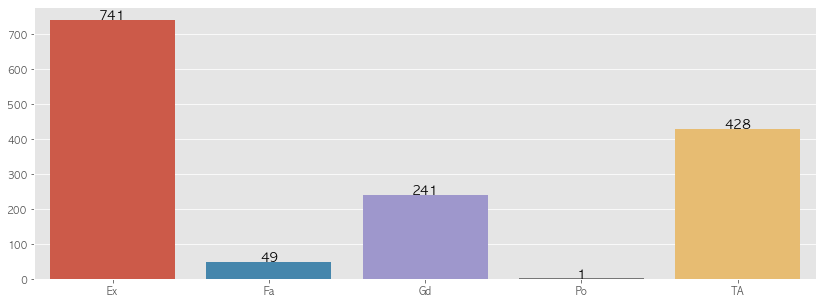

In [76]:
or_data_check(data = modify_data, feature = 'HeatingQC')

### [5]. KitchenQual

**KitchenQual** : Kitchen quality

- **Ex** : Excellent


- **Gd** : Good


- **TA** : Typical/Average


- **Fa** : Fair


- **Po** : Poor

Number of unique values of KitchenQual : 4 

Unique values of KitchenQual : ['Ex' 'Fa' 'Gd' 'TA'] 

The mode of KitchenQual : TA


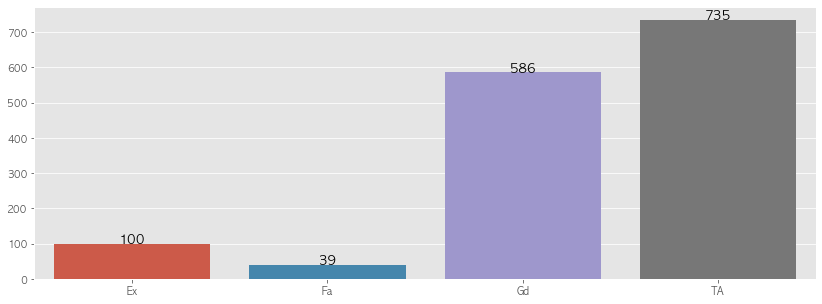

In [77]:
or_data_check(data = modify_data, feature = 'KitchenQual')

### [6]. FireplaceQu

**FireplaceQu** : Fireplace quality

- **Ex** : Excellent - Exceptional Masonry Fireplace


- **Gd** : Good - Masonry Fireplace in main level


- **TA** : Average - Prefabricated Fireplace in main living area or Masonry Fireplace in basement


- **Fa** : Fair - Prefabricated Fireplace in basement


- **Po** : Poor - Ben Franklin Stove


- **NA** : No Fireplace

Number of unique values of FireplaceQu : 6 

Unique values of FireplaceQu : ['Ex' 'Fa' 'Gd' 'No have' 'Po' 'TA'] 

The mode of FireplaceQu : No have


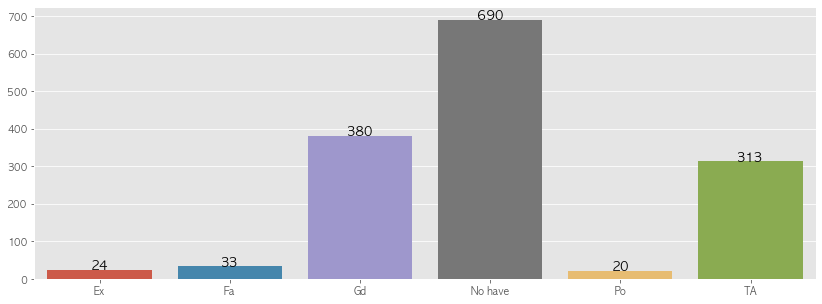

In [78]:
or_data_check(data = modify_data, feature = 'FireplaceQu')

### [7]. GarageQual & GarageCond

**GarageQual** : Garage quality (차고 품질)

**GarageCond** : Garage condition (차고 상태)

- **Ex** : Excellent


- **Gd** : Good


- **TA** : Typical/Average


- **Fa** : Fair


- **Po** : Poor


- **NA** : No Garage

Number of unique values of GarageQual : 6 

Unique values of GarageQual : ['Ex' 'Fa' 'Gd' 'No have' 'Po' 'TA'] 

The mode of GarageQual : TA 

Number of unique values of GarageCond : 6 

Unique values of GarageCond : ['Ex' 'Fa' 'Gd' 'No have' 'Po' 'TA'] 

The mode of GarageCond : TA


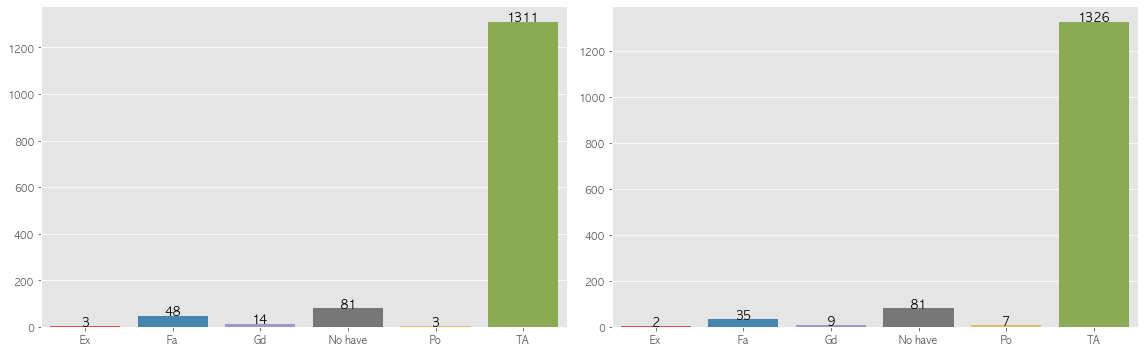

In [79]:
print('Number of unique values of GarageQual :', len(modify_data['GarageQual'].unique()), '\n')
print('Unique values of GarageQual :', np.sort(modify_data['GarageQual'].unique()), '\n')
print('The mode of GarageQual :', modify_data['GarageQual'].mode()[0], '\n')

print('Number of unique values of GarageCond :', len(modify_data['GarageCond'].unique()), '\n')
print('Unique values of GarageCond :', np.sort(modify_data['GarageCond'].unique()), '\n')
print('The mode of GarageCond :', modify_data['GarageQual'].mode()[0])

fig, axes = plt.subplots(ncols = 2, figsize = (16, 5))

# 'GarageQual'
plot_data = pd.DataFrame(modify_data['GarageQual'].value_counts().sort_index())

sns.barplot(x = plot_data.index, y = 'GarageQual', data = plot_data, ax = axes[0])
axes[0].set_ylabel('')

for index, [value] in enumerate(plot_data.values):
    axes[0].text(index, value, value, ha = 'center', fontsize = 12)

# 'GarageCond'
plot_data = pd.DataFrame(modify_data['GarageCond'].value_counts().sort_index())

sns.barplot(x = plot_data.index, y = 'GarageCond', data = plot_data, ax = axes[1])
axes[1].set_ylabel('')

for index, [value] in enumerate(plot_data.values):
    axes[1].text(index, value, value, ha = 'center', fontsize = 12)
    
fig.tight_layout()

- **GarageQual, GarageCond** 두 변수도 중간을 의미하는 범주가 가장 많이 관측된다.


- 하지만, 다른 척도들과 다르게 긍정적 평가보다 부정적 평가가 많음을 볼 수 있다.

### [8]. PoolQC

**PoolQC** : Pool quality

- **Ex** : Excellent


- **Gd** : Good


- **TA** : Average/Typical


- **Fa** : Fair


- **NA** : No Pool

Number of unique values of PoolQC : 4 

Unique values of PoolQC : ['Ex' 'Fa' 'Gd' 'No have'] 

The mode of PoolQC : No have


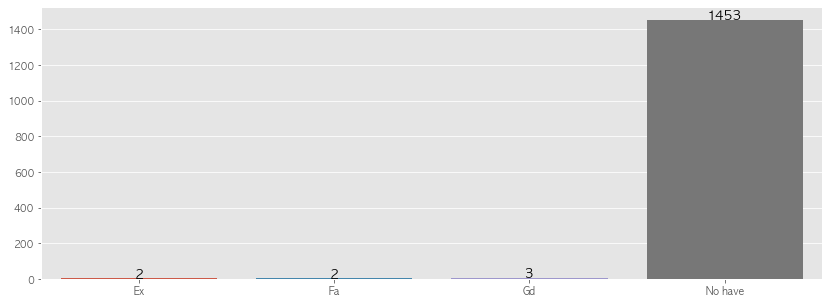

In [80]:
or_data_check(data = modify_data, feature = 'PoolQC')

- **PoolQc** 변수의 경우, 대부분의 관측치가 Pool을 보유하고 있지 않는다.


- 변수의 의미를 파악했을 때, 다른 변수와의 연관성이 없을 것으로 추측되며 분석에 도움이 되지 않을 것으로 판단된다.

### [9]. YearBuilt

**YearBuilt**: Original construction date (건축년도)

In [81]:
print('Number of unique values of YearBuilt :', len(modify_data['YearBuilt'].unique()), '\n')

# 가장 최근에 건축된 건물의 년도는?
print('The most recent year of construction :', max(modify_data['YearBuilt']), '\n')

# 가장 오래전에 건축된 건물의 년도는?
print('The oldest year of construction :', min(modify_data['YearBuilt']), '\n')

# 판매 가격이 가장 높은 관측치의 건축 년도
year = modify_data.loc[modify_data['SalePrice'] == max(modify_data['SalePrice']), 'YearBuilt'][691]
print('The year of construction with the highest selling price :', year, '\n')

# 판매 가격이 가장 낮은 관측치의 건축 년도
year = modify_data.loc[modify_data['SalePrice'] == min(modify_data['SalePrice']), 'YearBuilt'][495]
print('The year of construction with the lowest selling price :', year, '\n')

# 가장 건물이 많이 지어진 년도는?
print('The mode of YearBuilt :', modify_data['YearBuilt'].mode()[0])

Number of unique values of YearBuilt : 112 

The most recent year of construction : 2010 

The oldest year of construction : 1872 

The year of construction with the highest selling price : 1994 

The year of construction with the lowest selling price : 1920 

The mode of YearBuilt : 2006


### [10]. YearRemodAdd

**YearRemodAdd** : Remodel date (same as construction date if no remodeling or additions)

In [82]:
# 리모델링이 가장 많이 일어난 년도
print('The mode of YearRemodAdd :', modify_data['YearRemodAdd'].mode()[0])

The mode of YearRemodAdd : 1950


In [83]:
# 건축일로부터 몇년후에 리모델링을 했는지 나타내는 변수 만들기
print('Shape of modify_data *Before Create* :', modify_data.shape, '\n')

modify_data['DiffYear'] = modify_data['YearRemodAdd'] - modify_data['YearBuilt']
print('Shape of modify_data *After Create* :', modify_data.shape)

Shape of modify_data *Before Create* : (1460, 84) 

Shape of modify_data *After Create* : (1460, 85)


In [84]:
# 리모델링 여부를 나타내는 변수 만들기
print('Shape of modify_data *Before Create* :', modify_data.shape, '\n')

modify_data['Remodel'] = np.nan

for index in modify_data.index:
    
    # 'DiffYear' 값 저장
    value = modify_data.loc[index, 'DiffYear']
    
    # 'DiffYear'의 값이 0 보다 크면 리모델링 수행
    if value > 0:
        modify_data.loc[index, 'Remodel'] = 1
    
    else:
        modify_data.loc[index, 'Remodel'] = 0
        
print('Shape of modify_data *After Create* :', modify_data.shape, '\n')
print('Unique values of Remodel :', modify_data['Remodel'].unique())

Shape of modify_data *Before Create* : (1460, 85) 

Shape of modify_data *After Create* : (1460, 86) 

Unique values of Remodel : [0. 1.]


### [11]. GarageYrBlt

**GarageYrBlt** : Year garage was built

In [85]:
# 차고가 가장 많이 지어진 년도
print('The mode of GarageYrBlt :', modify_data['GarageYrBlt'].mode()[0])

The mode of GarageYrBlt : 9999.0


- GarageYrBlt 변수는 후에 분석을 통하여, 다른 변수와 이용해 파생변수를 만들어 줘야 분석에 도움이 될 것으로 판단된다.

### [12]. MoSold

**MoSold** : Month Sold (MM)

Number of unique values of MoSold : 12 

Unique values of MoSold : [ 1  2  3  4  5  6  7  8  9 10 11 12] 

The mode of MoSold : 6


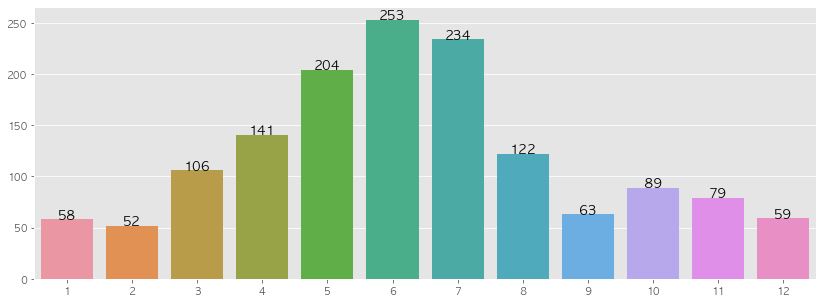

In [86]:
or_data_check(data = modify_data, feature = 'MoSold')

- 위의 시각화를 보면, **3월부터 6월**까지 판매량이 증가하다가 **7월**에 감소하는 것을 볼 수 있다.

### [13]. YrSold

**YrSold** : Year Sold (YYYY)

Number of unique values of YrSold : 5 

Unique values of YrSold : [2006 2007 2008 2009 2010] 

The mode of YrSold : 2009


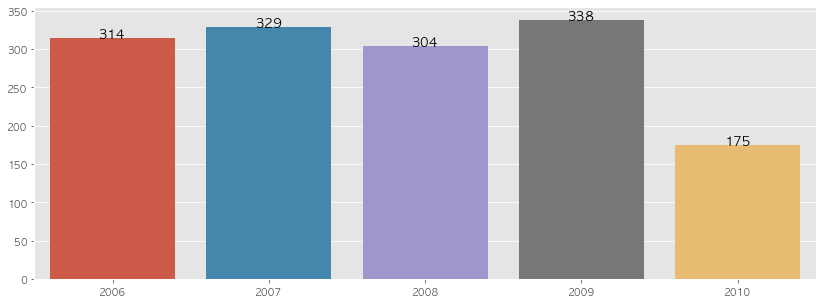

In [87]:
or_data_check(data = modify_data, feature = 'YrSold')

- 위의 시각화를 통해, 현재 데이터는 **2006년부터 2010년** 까지의 판매된 데이터 임을 알 수 있다.


- 모든 년도마다 동일하게 집이 판매되었음을 볼 수 있다.

- **MoSold**와 **YrSold** 두 변수를 사용하여 년도와 월 정보를 함께 포함하고 있는 변수를 만들어주도록 하자.

In [88]:
print('Shape of modify_data *Before Create* :', modify_data.shape, '\n')

modify_data['YearMonth'] = np.nan

for index in modify_data.index:
    
    year = str(modify_data.loc[index, 'YrSold'])
    month = str(modify_data.loc[index, 'MoSold'])
    
    modify_data.loc[index, 'YearMonth'] = year + '-' + month
    
# 날짜형으로 변환
modify_data['YearMonth'] = pd.to_datetime(modify_data['YearMonth'])

print('Shape of modify_data *After Create* :', modify_data.shape, '\n')
print('Null values of YearMonth :', modify_data['YearMonth'].isnull().sum())

Shape of modify_data *Before Create* : (1460, 86) 

Shape of modify_data *After Create* : (1460, 87) 

Null values of YearMonth : 0


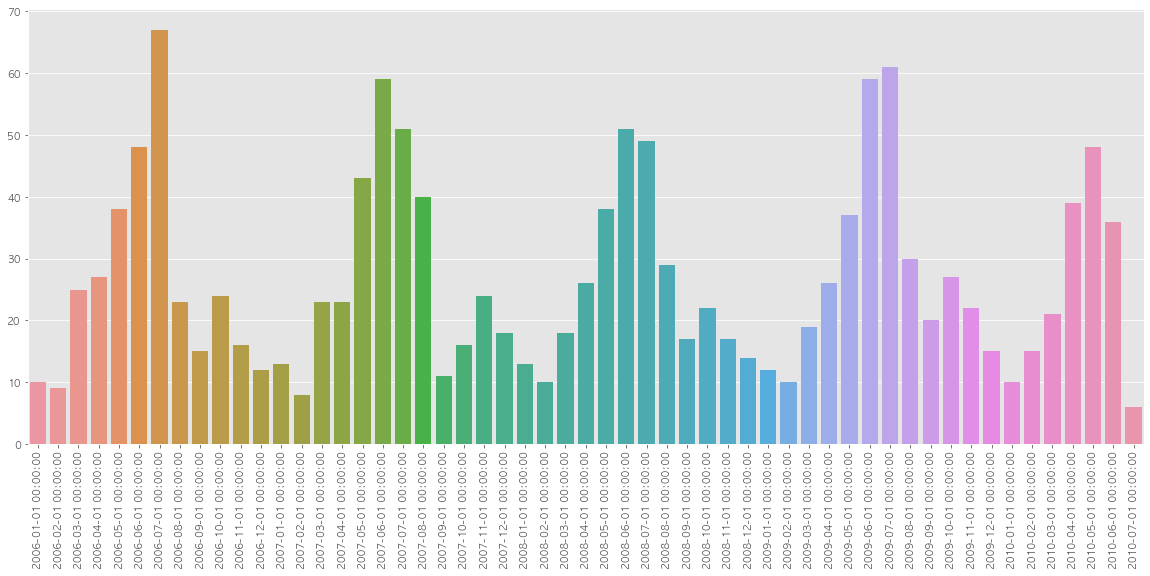

In [90]:
# 'YearMonth' 변수 시각화
plot_data = pd.DataFrame(modify_data['YearMonth'].value_counts().sort_index())

plt.figure(figsize = (20, 8))

sns.barplot(x = plot_data.index, y = 'YearMonth', data = plot_data)
plt.ylabel('')
plt.xticks(rotation = 90)
plt.show()

- 모든 년도마다 **3월부터** 판매량이 증가하다가 **7월부터** 감소하는 비슷한 패턴이 발견된다.


- 년도마다 판매량의 큰 차이는 없는 것으로 나타난다.